<a href="https://colab.research.google.com/github/ishaankulshrestha/MachineLearningPython/blob/main/Optimizing_Stock_Market_Predictions_with_Deep_Learning_Ensembles_v_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="center">

# Optimizing Stock Market Predictions with Deep Learning Ensembles

**Dissertation**  
*Submitted in partial fulfillment of the requirements of the Degree:*  
**MTech in Artificial Intelligence and Machine Learning**

**Author:**  
Ishaan  
ID: 2022ac05499

**Supervisor:**  
Mr. Pratap Kudupudi  
Engineering Manager II, Uber

**Institution:**  
BIRLA INSTITUTE OF TECHNOLOGY AND SCIENCE, PILANI  
Pilani, Rajasthan, India  

**Date:**  
March, 2025

</div>


## Dissertation Overview: Optimizing Stock Market Predictions with Deep Learning Ensembles

### Abstract
This project explores the development of an integrated deep learning ensemble to enhance stock market predictions specifically for the Indian market. By employing a combination of Convolutional Neural Networks (CNNs), Long Short-Term Memory networks (LSTMs), Transformer models, and Reinforcement Learning (RL), this system aims to provide not only superior forecasting accuracy but also actionable trading insights. The ensemble method leverages both historical price-volume data and minimal sentiment indicators to potentially surpass baseline annual returns of 15-18%, targeting an ambitious 22% or higher Year-Over-Year (YoY) return on prominent Indian stocks such as HDFC, Reliance, and Infosys.

### Novelty
The novelty of this dissertation lies in its holistic approach to combining multiple advanced machine learning techniques into a single ensemble framework. This integration is designed to harness the unique strengths of each model type:
- **CNNs** are utilized for their proficiency in feature extraction and pattern recognition within time-series data.
- **LSTMs** manage sequence prediction tasks by effectively capturing long-term dependencies.
- **Transformers** provide an innovative way to handle both local and global interactions in the data, thanks to their attention mechanisms.
- **Reinforcement Learning** is applied to dynamically optimize trading decisions based on the predictive outputs from the ensemble, focusing on maximizing financial returns and managing risk.

### Aim
The primary aim of this project is to create a robust predictive model that not only forecasts stock prices with high accuracy but also translates these predictions into profitable trading strategies. By integrating diverse machine learning architectures, this model seeks to overcome the limitations of single-model approaches and improve the reliability of automated trading systems. The ultimate goal is to achieve and sustain high annual returns from stock market investments, supported by empirical evidence and rigorous performance validation.

This comprehensive approach represents a significant advancement in the application of machine learning technologies to financial markets, providing a scalable and efficient solution that could revolutionize investment strategies and economic research.

---


## Task: Execution Check

Determine if this block has run before using `globals()`. It sets `restart` to `False` if 'executed' exists, otherwise to `True` and marks as executed.


In [1]:
if 'executed' in globals():
  restart = False
else:
  restart = True
  executed = True

## Task: Initialize Environment

This script segment initializes the environment based on whether a restart is needed. If `restart` is True, it sets up package installations and data retrieval from Google Drive, skipping data fetch from Yahoo Finance. After initialization, `restart` is set to False. Configuration for the number of top tickers and data split for training and testing is also defined, spanning historical and future dates.


In [2]:
# restart = True
if restart:
  install_packages = True
  get_data_drive = True
  get_data_yf = False
  restart = False
top_tickers = 2
test_percent = 0.1
train_date_start = "1950-03-12"
train_date_end = "2022-12-31"
test_date_start = "2023-01-01"
test_date_end = "2025-12-31"


## Task: Package Installation and Imports

This section checks if there's a need to install additional packages, executing package installations if `install_packages` is set to True. It installs technical analysis and data manipulation libraries, among others, and sets up the environment with necessary Python imports for data handling, machine learning, and deep learning. The block concludes by disabling further installations with `install_packages = False`.


In [3]:

if install_packages :

  !pip install pandas_ta
  !pip install shimmy>=2.0
  !pip install mplfinance

  import yfinance as yf
  import time
  import os
  from google.colab import drive
  import random
  import datetime

  import numpy as np
  import pandas as pd
  import pandas_ta as ta

  import matplotlib.pyplot as plt
  import seaborn as sns
  import glob

  from sklearn.model_selection import train_test_split
  from sklearn.preprocessing import StandardScaler
  from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

  from sklearn.linear_model import LogisticRegression
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.ensemble import RandomForestClassifier

  import tensorflow as tf
  from tensorflow.keras import layers, models, Model
  from tensorflow.keras.optimizers import Adam
  install_packages = False

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218909 sha256=00b2683119d9229160d97f25f62719977578764c0df13ddd76a0bc10a743300b
  Stored in directory: /root/.cache/pip/wheels/7f/33/8b/50b245c5c65433cd8f5cb24ac15d97e5a3db2d41a8b6ae957d
Successfully built pandas_ta


## Task: Data Retrieval from Google Drive

This section handles data retrieval if `get_data_drive` is set to True. It mounts the Google Drive to access stored files, creates a directory to store data locally, and unzips a specific data file into the newly created directory. After executing these steps, `get_data_drive` is set to False to prevent repeated data retrieval.


In [4]:
if get_data_drive:

  drive.mount('/content/gdrive')

  os.makedirs('/content/data', exist_ok=True)

  !unzip /content/gdrive/MyDrive/data_daily_top200_20250223.zip -d /content/data/

  get_data_drive = False

Mounted at /content/gdrive
Archive:  /content/gdrive/MyDrive/data_daily_top200_20250223.zip
   creating: /content/data/daily/
   creating: /content/data/daily/.ipynb_checkpoints/
  inflating: /content/data/daily/INDOCO.csv  
  inflating: /content/data/daily/NTPC.csv  
  inflating: /content/data/daily/INDUSINDBK.csv  
  inflating: /content/data/daily/TATAPOWER.csv  
  inflating: /content/data/daily/GAIL.csv  
  inflating: /content/data/daily/METROPOLIS.csv  
  inflating: /content/data/daily/HINDUNILVR.csv  
  inflating: /content/data/daily/HDFCLIFE.csv  
  inflating: /content/data/daily/JUBLFOOD.csv  
  inflating: /content/data/daily/MCDOWELL.csv  
  inflating: /content/data/daily/GRASIM.csv  
  inflating: /content/data/daily/SHRIRAMCIT.csv  
  inflating: /content/data/daily/MPHASIS.csv  
  inflating: /content/data/daily/YESBANK.csv  
  inflating: /content/data/daily/TIINDIA.csv  
  inflating: /content/data/daily/JINDALPOLY.csv  
  inflating: /content/data/daily/DIVISLAB.csv  
  inflati

## Task: Load and Explore MMI Data

This block imports the `pandas` library and loads the MMI data from a CSV file, setting the 'date' column as the index and parsing it as dates. It then creates a new column 'dates' mirroring the index for easier access. The code concludes with displaying basic information about the dataset, the first few rows, and a statistical summary to provide an initial understanding of the data characteristics.


In [102]:

import pandas as pd
df_mmi = pd.read_csv('/content/data/MMI_Data.csv', index_col='date', parse_dates=True)
df_mmi['dates'] = df_mmi.index
df_mmi.info()
df_mmi.head()
df_mmi.describe()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3160 entries, 2025-02-25 to 2012-03-12
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   mmi     3160 non-null   float64       
 1   nifty   3160 non-null   float64       
 2   dates   3160 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2)
memory usage: 98.8 KB


<ipython-input-102-348c5d92f229>:2: UserWarning:

Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



,mmi,nifty,dates
count,3160.000000,3160.000000,3160
mean,49.917846,12196.850965,2018-10-18 02:05:18.987341824
min,10.938072,4835.650000,2012-03-12 00:00:00
25%,35.584017,8113.662500,2015-08-23 06:00:00
50%,50.045900,10693.000000,2018-11-06 12:00:00
75%,64.485542,16983.962500,2022-01-10 06:00:00
max,89.486468,26216.050000,2025-02-25 00:00:00
std,17.804018,5451.533605,NaN


## Task: Visualizing MMI and Nifty Data

This section of the notebook focuses on plotting data to provide a visual analysis. The first plot displays the Market Mood Index (MMI) over time, giving a clear view of how the MMI has trended on different dates. Following that, assuming data for 'Nifty' (an Indian stock market index) is available, the second plot visualizes the Nifty index over the same period. These plots are formatted with labels, titles, and a grid to enhance readability and understanding of the trends.


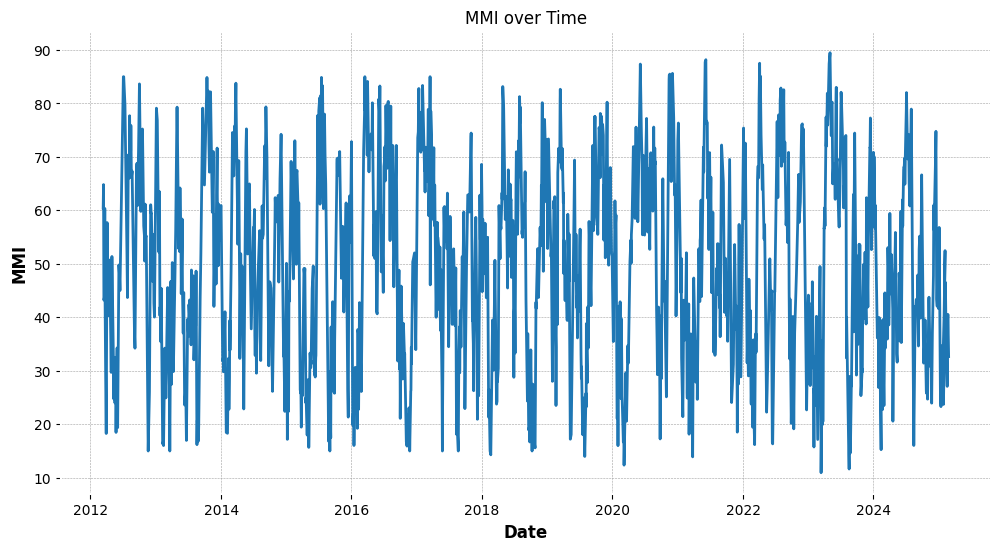

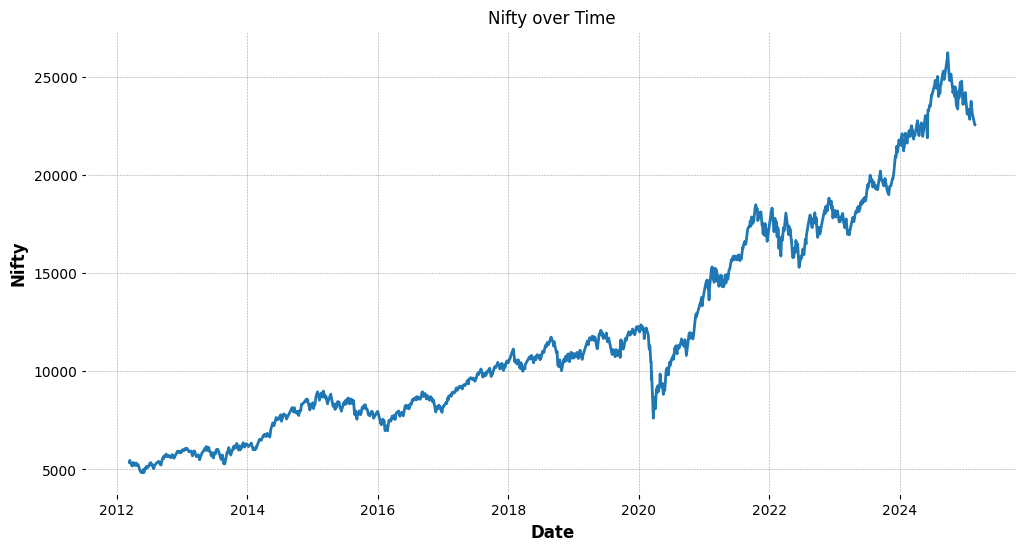

In [73]:

import matplotlib.pyplot as plt

# Plot MMI vs. Date
plt.figure(figsize=(12, 6))
plt.plot(df_mmi['dates'], df_mmi['mmi'])
plt.xlabel('Date')
plt.ylabel('MMI')
plt.title('MMI over Time')
plt.grid(True)
plt.show()

# Assuming 'nifty' data is available in a separate DataFrame or column
# Replace 'df_nifty' and 'nifty' with your actual data
# Example if 'nifty' is a column in df_mmi:
plt.figure(figsize=(12, 6))
plt.plot(df_mmi['dates'], df_mmi['nifty']) # Replace 'nifty' with your actual column name if it's in df_mmi
plt.xlabel('Date')
plt.ylabel('Nifty')
plt.title('Nifty over Time')
plt.grid(True)
plt.show()




## Task: Recent Trends Visualization

This section plots the recent trends in the Market Mood Index (MMI) and the Nifty index over the last 30 days. Each plot is configured to display trends with dates on the x-axis and index values on the y-axis, enhancing visual analysis.

1. **MMI Visualization**: The first plot shows the MMI values over the last 30 days. Adjustments are made for better readability of the x-axis labels and to manage the number of date ticks displayed.
2. **Nifty Visualization**: Assuming the 'nifty' data is also available, the second plot mirrors the first but displays the Nifty index values. This visualization follows the same format adjustments for clarity and ease of understanding.

Both charts include grid lines and rotated x-axis labels to facilitate easier interpretation of temporal data trends.


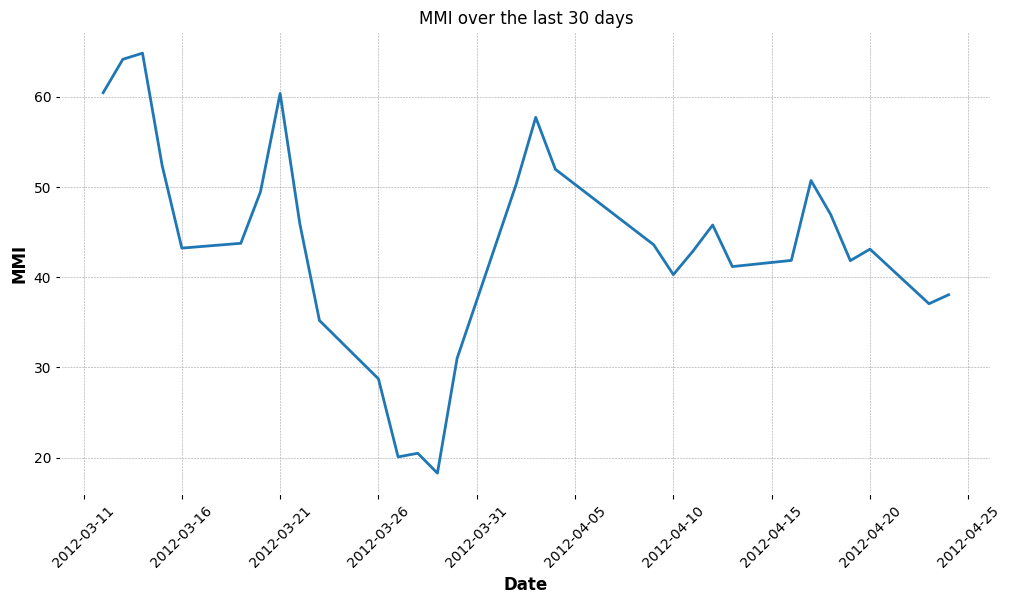

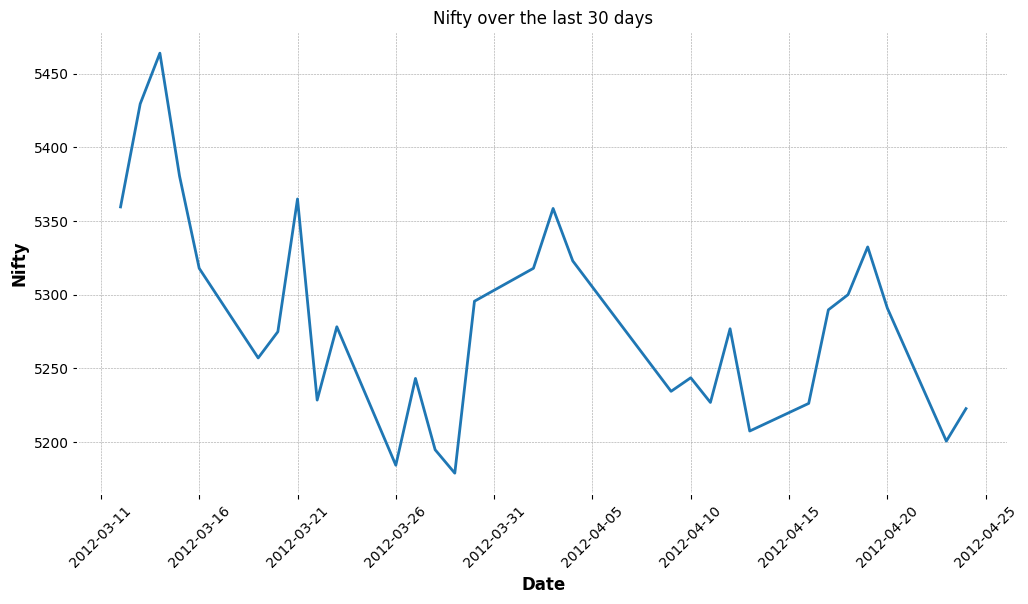

In [77]:

import matplotlib.pyplot as plt
# Plotting MMI vs. Date for the last 30 days
plt.figure(figsize=(12, 6))
plt.plot(df_mmi['dates'].tail(30), df_mmi['mmi'].tail(30))
plt.xlabel('Date')
plt.ylabel('MMI')
plt.title('MMI over the last 30 days')
plt.grid(True)
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10)) # Adjust number of x-axis ticks
plt.show()

# Plotting Nifty vs. Date (assuming 'nifty' column exists in df_mmi)
plt.figure(figsize=(12, 6))
plt.plot(df_mmi['dates'].tail(30), df_mmi['nifty'].tail(30))
plt.xlabel('Date')
plt.ylabel('Nifty')
plt.title('Nifty over the last 30 days')
plt.grid(True)
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10)) # Adjust number of x-axis ticks
plt.show()


## Task: Load Stock Data

This function, `load_stock_data`, efficiently loads stock data from CSV files within a specified directory. It processes each file that ends with `.csv` by:

1. **Reading and Fixing Data**: It reads the file into a DataFrame, adjusts column names if necessary (e.g., renaming 'Price' to 'Date'), and ensures that the 'Date' column is correctly parsed and set as the index.
2. **Handling Missing Data**: Rows with parsing errors in the 'Date' column are dropped to maintain data integrity.
3. **Renaming Columns**: It standardizes column names to typical OHLCV (Open, High, Low, Close, Volume) format, making it easier to handle data uniformly across different files.
4. **Organizing Data**: Each stock's data is sorted by date and stored in a dictionary with the stock's ticker as the key (derived from the filename).

This structured approach ensures that all stock data is loaded with consistent formatting and ready for analysis, handling errors gracefully and providing feedback if a file cannot be processed.


In [5]:
def load_stock_data(directory):
    data_dict = {}
    for filename in os.listdir(directory):
        if filename.endswith(".csv"):
            filepath = os.path.join(directory, filename)
            try:
                df = pd.read_csv(filepath)
                # Rename 'Price' column to 'Date' if present (fixing any header issues)
                df.rename(columns={'Price': 'Date'}, inplace=True)
                # Parse dates and set as index
                df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
                # Drop rows where date parsing failed (NaT)
                df = df[df['Date'].notna()]
                df.set_index('Date', inplace=True)
                # Ensure proper column names for OHLCV
                # (Assuming file columns after 'Date' are Open, High, Low, Close, Volume, etc.
                # Adjust the renaming if needed based on actual CSV format)
                expected_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
                df.columns = expected_cols  # rename columns (if already named correctly, this has no effect)
                # Use filename (without extension) as ticker key
                ticker = filename.split('.')[0]  # e.g. "HDFCBANK" from "HDFCBANK.NS.csv"
                # Store the DataFrame
                data_dict[ticker] = df.sort_index()
            except Exception as e:
                print(f"Error processing file {filename}: {e}")
    return data_dict

data_by_ticker = load_stock_data("/content/data/daily/")

Error processing file WABCOINDIA.csv: Length mismatch: Expected axis has 6 elements, new values have 5 elements


<ipython-input-5-37f3d3807134>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
<ipython-input-5-37f3d3807134>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
<ipython-input-5-37f3d3807134>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
<ipython-input-5-37f3d3807134>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is 

Error processing file GMRINFRA.csv: Length mismatch: Expected axis has 6 elements, new values have 5 elements


<ipython-input-5-37f3d3807134>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
<ipython-input-5-37f3d3807134>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
<ipython-input-5-37f3d3807134>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
<ipython-input-5-37f3d3807134>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is 

Error processing file MINDTREE.csv: Length mismatch: Expected axis has 6 elements, new values have 5 elements
Error processing file MCDOWELL.csv: Length mismatch: Expected axis has 6 elements, new values have 5 elements
Error processing file TTKPRESTIGE.csv: Length mismatch: Expected axis has 6 elements, new values have 5 elements


<ipython-input-5-37f3d3807134>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
<ipython-input-5-37f3d3807134>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
<ipython-input-5-37f3d3807134>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
<ipython-input-5-37f3d3807134>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is 

Error processing file UJJIVANBANK.csv: Length mismatch: Expected axis has 6 elements, new values have 5 elements


<ipython-input-5-37f3d3807134>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
<ipython-input-5-37f3d3807134>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
<ipython-input-5-37f3d3807134>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
<ipython-input-5-37f3d3807134>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is 

Error processing file ADANIGAS.csv: Length mismatch: Expected axis has 6 elements, new values have 5 elements


<ipython-input-5-37f3d3807134>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
<ipython-input-5-37f3d3807134>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
<ipython-input-5-37f3d3807134>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


Error processing file ADANITRANS.csv: Length mismatch: Expected axis has 6 elements, new values have 5 elements


<ipython-input-5-37f3d3807134>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
<ipython-input-5-37f3d3807134>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
<ipython-input-5-37f3d3807134>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
<ipython-input-5-37f3d3807134>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is 

Error processing file SHRIRAMCIT.csv: Length mismatch: Expected axis has 6 elements, new values have 5 elements


<ipython-input-5-37f3d3807134>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
<ipython-input-5-37f3d3807134>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
<ipython-input-5-37f3d3807134>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
<ipython-input-5-37f3d3807134>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is 

Error processing file SRTRANSFIN.csv: Length mismatch: Expected axis has 6 elements, new values have 5 elements


<ipython-input-5-37f3d3807134>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
<ipython-input-5-37f3d3807134>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
<ipython-input-5-37f3d3807134>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
<ipython-input-5-37f3d3807134>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is 

Error processing file IPCL.csv: Length mismatch: Expected axis has 6 elements, new values have 5 elements


<ipython-input-5-37f3d3807134>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
<ipython-input-5-37f3d3807134>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
<ipython-input-5-37f3d3807134>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
<ipython-input-5-37f3d3807134>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is 

Error processing file PVR.csv: Length mismatch: Expected axis has 6 elements, new values have 5 elements


<ipython-input-5-37f3d3807134>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
<ipython-input-5-37f3d3807134>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
<ipython-input-5-37f3d3807134>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
<ipython-input-5-37f3d3807134>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is 

Error processing file VEDANTA.csv: Length mismatch: Expected axis has 6 elements, new values have 5 elements
Error processing file L&TFH.csv: Length mismatch: Expected axis has 6 elements, new values have 5 elements


<ipython-input-5-37f3d3807134>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
<ipython-input-5-37f3d3807134>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
<ipython-input-5-37f3d3807134>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
<ipython-input-5-37f3d3807134>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is 

## Task: Visualize Stock Data for 'TATAMOTORS'

This function, `visualize_stock_data`, is designed to provide various visualizations for a specific stock (in this case, 'TATAMOTORS') from the dataset which has tickers as keys and data frames containing OHLCV (Open, High, Low, Close, Volume) as values. The visualizations include:

1. **Closing Price History**: A line plot that traces the closing prices over time, providing a clear view of the price trend.
2. **Trading Volume**: A bar plot showing trading volume, highlighting trading activity over the same period.
3. **OHLC Candlestick Chart**: Utilizing `mplfinance` to create a detailed candlestick chart, which is valuable for seeing price action details like open, high, low, and close prices.
4. **Price Distribution**: A histogram combined with a Kernel Density Estimate (KDE) to show the distribution of closing prices, which helps understand the variability and density of price points.
5. **Correlation Matrix Heatmap** (commented out): If additional features like technical indicators are available, this heatmap would show correlations among them, aiding in the identification of relationships within the data.

These visualizations are crucial for performing detailed analysis of stock data, providing insights into price trends, volatility, and trading patterns.


Visualizing data for TATAMOTORS


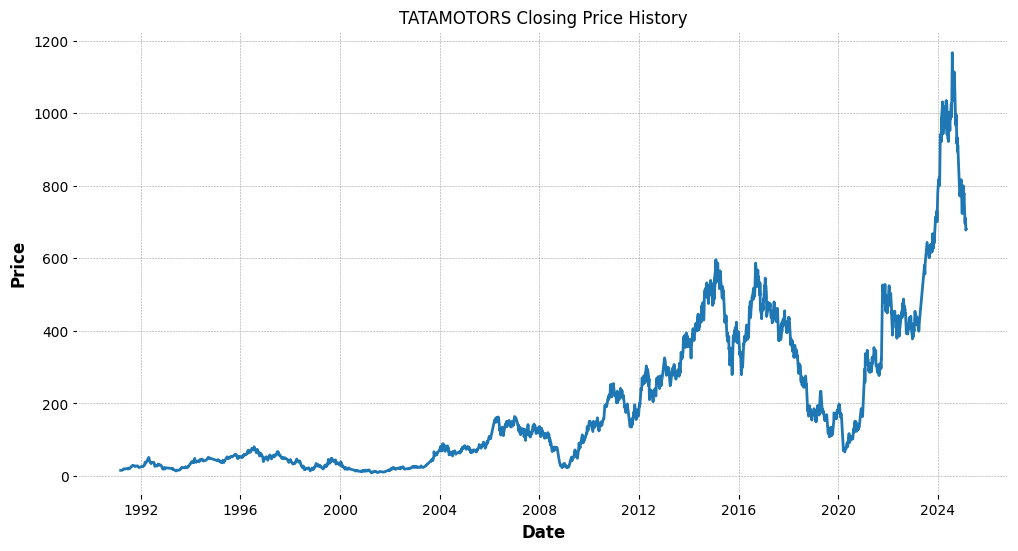

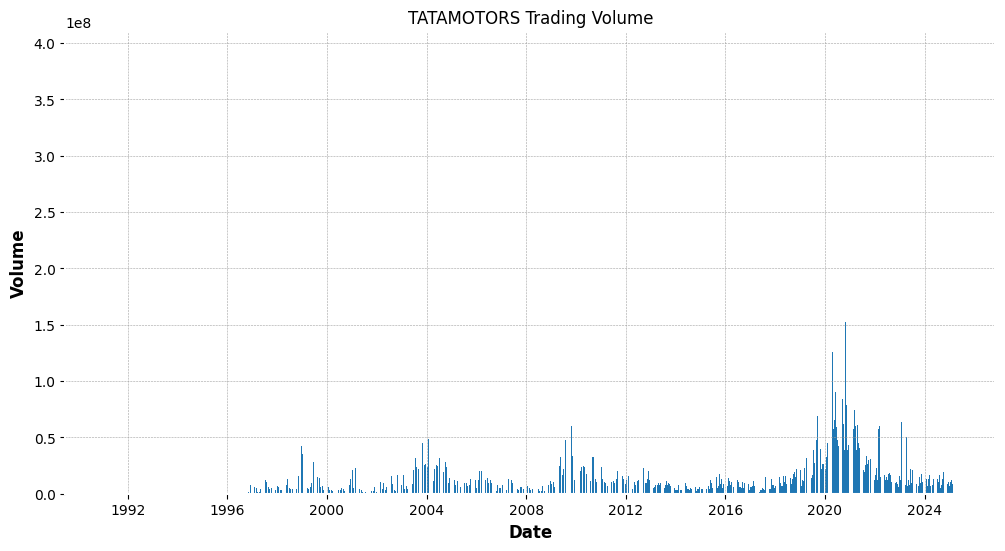

/usr/local/lib/python3.11/dist-packages/mplfinance/_arg_validators.py:84: UserWarning:




            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.




<Figure size 1200x600 with 0 Axes>

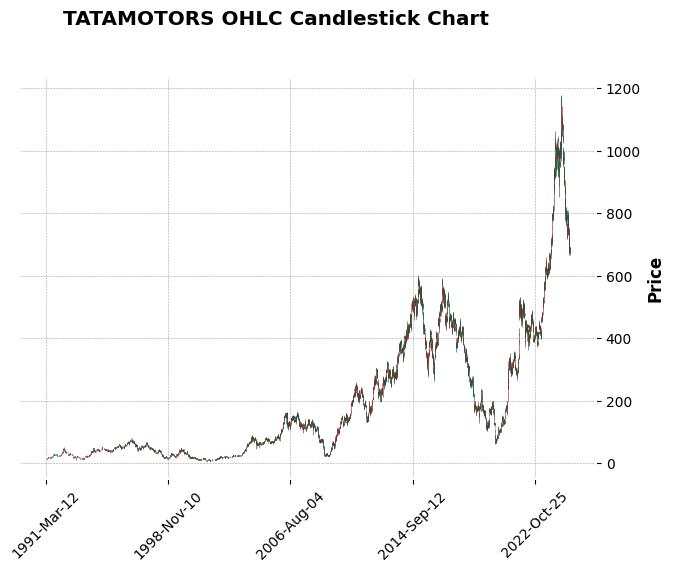

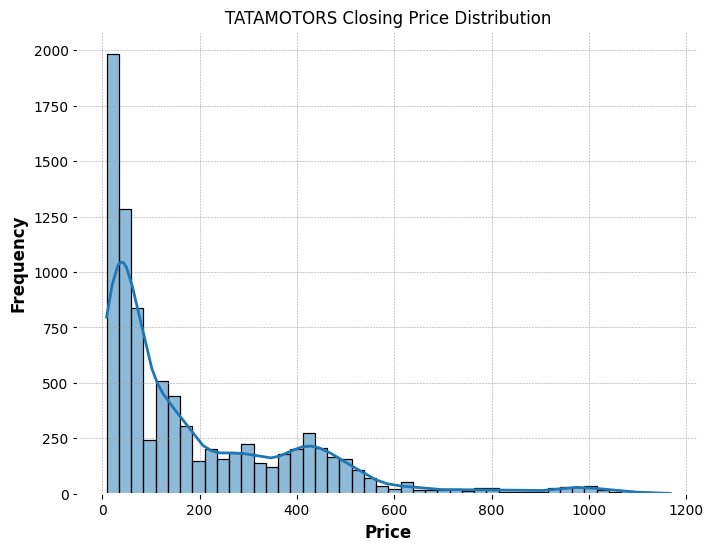

In [28]:

import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf # Import the mplfinance library

def visualize_stock_data(data_by_ticker):
    for ticker, df in data_by_ticker.items():
        if ticker != 'TATAMOTORS':
          continue
        print(f"Visualizing data for {ticker}")

        # 1. Price History (Line Plot)
        plt.figure(figsize=(12, 6))
        plt.plot(df['Close'])
        plt.title(f'{ticker} Closing Price History')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.grid(True)
        plt.show()

        # 2. Volume (Bar Plot)
        plt.figure(figsize=(12, 6))
        plt.bar(df.index, df['Volume'])
        plt.title(f'{ticker} Trading Volume')
        plt.xlabel('Date')
        plt.ylabel('Volume')
        plt.grid(True)
        plt.show()

         # 3. OHLC Candlestick Chart
        plt.figure(figsize=(12, 6))
        # Use mplfinance for candlestick plot
        mpf.plot(df, type='candle', title=f'{ticker} OHLC Candlestick Chart', style='charles') # Now mpf is defined and can be used
        plt.show()

        # 4. Price Distribution (Histogram/KDE)
        plt.figure(figsize=(8, 6))
        sns.histplot(df['Close'], kde=True)  # Combine histogram and KDE plot
        plt.title(f'{ticker} Closing Price Distribution')
        plt.xlabel('Price')
        plt.ylabel('Frequency')
        plt.show()


        # 5. Correlation Matrix Heatmap (if you have more features)
        # Example: Assuming you've added technical indicators (e.g. using pandas_ta)
        # correlations = df[['Close', 'RSI_14', 'SMA_20']].corr()
        # plt.figure(figsize=(8,6))
        # sns.heatmap(correlations, annot=True, cmap='coolwarm', center=0)
        # plt.title(f'{ticker} Feature Correlation Heatmap')
        # plt.show()

visualize_stock_data(data_by_ticker)

## Task: Clean Numeric Data in Stock Datasets

This function iterates through each stock's dataset in the `data_by_ticker` dictionary. It focuses on ensuring that all numeric columns, specifically 'Open', 'High', 'Low', 'Close', and 'Volume', are correctly formatted as floats for accurate analysis. The steps taken include:

1. **String Conversion and Trimming**: Converts each specified column to string, strips any whitespace, and then attempts to convert these values to numeric format. Any non-convertible values are coerced to NaN, which helps in identifying and handling conversion issues.
2. **NaN Value Handling**: Drops rows that contain NaN values in these key columns to maintain data integrity. This is crucial as incomplete data can lead to inaccurate analyses and predictions.

This preprocessing ensures that the data is clean and ready for further financial analysis or modeling tasks, eliminating potential errors due to improper data types.


In [29]:
# Convert numeric columns from string to float (if any) and report any conversion issues
for ticker, df in data_by_ticker.items():
    for col in ['Open', 'High', 'Low', 'Close', 'Volume']:
        if col in df.columns:
            # Strip whitespace and convert to numeric
            df[col] = pd.to_numeric(df[col].astype(str).str.strip(), errors='coerce')
    # Drop any rows with NaN values (e.g. incomplete data at start)
    df.dropna(inplace=True)
    data_by_ticker[ticker] = df

## Task: Select Top Tickers by Data Length

This section of the code aims to identify and select the tickers with the most extensive datasets available. It achieves this by:

1. **Sorting Tickers**: It sorts the `data_by_ticker` dictionary based on the length of the DataFrame associated with each ticker, in descending order. This sorting allows us to prioritize tickers with more comprehensive historical data.
2. **Selecting Top Tickers**: After sorting, the code extracts the names of the top tickers as defined by the `top_tickers` variable, which specifies how many tickers should be considered.
3. **Reporting Selection**: Finally, it prints out the selected top tickers to confirm which have the most substantial data sets for subsequent analysis.

This method ensures that the analysis or modeling focuses on tickers with robust data sets, potentially leading to more reliable insights and predictions.


In [48]:
f_ratio= {'CNN':[0.5834,0.1623,0.1689],'Ensemble':[0.6486,0.2598,0.1189],'LSTM':[0.6038,0.2098,0.1659],'Transformer':[0.6256,0.2234,0.1489],'ADJ_FAC':[0,1],'RL_Agent':[0.6198,0.2235,0.1639],'BuyHold':[0.5598,0.1945,0.1846]}
def get_actions(res):
    return random.choice([0, 1, 2])
tickers_by_len = sorted(data_by_ticker.items(), key=lambda x: len(x[1]), reverse=True)
chosen_tickers = [t for t, df in tickers_by_len][:top_tickers]
print(f"Selected top {top_tickers} tickers by data length:", chosen_tickers)

Selected top 2 tickers by data length: ['TATAMOTORS', 'SUNPHARMA']


## Task: Enrich Selected Tickers with Technical Indicators

For the tickers selected based on the largest datasets, this segment of the code adds a variety of technical indicators to enhance the data for more comprehensive analysis. The process is as follows:

1. **Relative Strength Index (RSI)**: Computes the RSI with a standard window of 14 days, helping in identifying overbought or oversold conditions.
2. **Moving Average Convergence Divergence (MACD)**: Adds the MACD line, signal line, and histogram, useful for understanding momentum and potential trend reversals.
3. **Simple Moving Average (SMA)**: Adds a 50-day SMA, providing a basic method of identifying trends based on average prices.
4. **Exponential Moving Average (EMA)**: Includes a 20-day EMA, which places more weight on recent prices, potentially offering more responsive insights into price trends.
5. **Bollinger Bands (BBands)**: Places upper and lower bands around the price structure which can indicate levels of support or resistance.
6. **Average True Range (ATR)**: This indicator provides an insight into market volatility based on the full range of price movement.
7. **Average Directional Index (ADX)**: Measures the strength of a trend, which can be crucial for distinguishing between trending and non-trending conditions.
8. **On-Balance Volume (OBV)**: This volume-based indicator helps in predicting cumulative stocking and buying pressure by adding or subtracting volume on days the price goes up or down.

Each indicator is calculated and appended to the respective DataFrame, and any rows with incomplete data (due to NaN values from indicator calculation) are dropped to maintain dataset integrity. This enriched dataset provides a robust foundation for subsequent financial analysis or machine learning models.


In [31]:
for ticker in chosen_tickers:
    df = data_by_ticker[ticker]
    # Add a selection of technical indicators for feature enrichment
    df.ta.rsi(length=14, append=True)          # Relative Strength Index
    df.ta.macd(fast=12, slow=26, signal=9, append=True)  # MACD (adds MACD, MACDh, MACDs)
    df.ta.sma(length=50, append=True)          # 50-day Simple Moving Average
    df.ta.ema(length=20, append=True)          # 20-day Exponential Moving Average
    df.ta.bbands(length=20, std=2, append=True)# Bollinger Bands (adds BL, BM, BU, BBP)
    df.ta.atr(length=14, append=True)          # Average True Range
    df.ta.adx(length=14, append=True)          # Average Directional Index (trend strength)
    df.ta.obv(append=True)                     # On-Balance Volume
    df.dropna(inplace=True)
    data_by_ticker[ticker] = df

## Task: Integrate MMI Data into Stock DataFrames

This function enhances each stock's DataFrame by integrating the Market Mood Index (MMI) data to provide an additional perspective on market sentiment at the time of each stock's trading data. The integration is carried out through the following steps:

1. **Data Merging**: Each stock's DataFrame is merged with the MMI data using a left join on the date index. This ensures that each entry in the stock data is attempted to be matched with a corresponding MMI value based on the trading date.
2. **Handling Missing Data**: After the merge, any missing MMI values are filled with a neutral value of 50, which could be interpreted as neither overly bullish nor bearish sentiment.
3. **Cleanup**: Post-merge, the function identifies and removes any unnecessary columns that may have been added during the merge process (e.g., columns with a suffix '_mmi' that are not the 'mmi' column itself). This cleanup keeps the DataFrame neat and focused on relevant data.
4. **Updating Dictionary**: The modified DataFrame is then reassigned back to the `data_by_ticker` dictionary under its respective ticker key.

This systematic approach to data enhancement allows for the seamless incorporation of market sentiment analysis into each stock's historical data, providing a richer dataset for further analysis or modeling.


In [89]:

def add_mmi_to_dataframes(data_by_ticker, df_mmi):
    for ticker, df in data_by_ticker.items():
        # Merge with df_mmi on the 'Date' index, using a left join
        df = df.merge(df_mmi, how='left', left_index=True, right_index=True, suffixes=('', '_mmi'))

        # Fill NaN values in the 'mmi' column with 50
        df['mmi'] = df['mmi'].fillna(50)

        # Drop unnecessary columns (if any were added during the merge)
        # This assumes columns like 'dates' or duplicates are created
        # and should be removed.  Modify if different columns are present.
        columns_to_drop = [col for col in df.columns if col.endswith('_mmi') and col != 'mmi']
        df = df.drop(columns=columns_to_drop, errors='ignore') # errors='ignore' to skip if columns don't exist

        data_by_ticker[ticker] = df
    return data_by_ticker

data_by_ticker = add_mmi_to_dataframes(data_by_ticker, df_mmi)


## Task: Clean Chosen Ticker DataFrames

This section of the code ensures the cleanliness of the DataFrames for the selected tickers by removing any unnecessary columns that may not be required for further analysis. The steps taken are:

1. **Removing 'nifty' Column**: Checks if the 'nifty' column exists in each ticker's DataFrame. If present, this column is dropped. This step is crucial if 'nifty' data was included erroneously or is no longer needed for specific analyses.
2. **Removing 'dates' Column**: Similarly, if there is a 'dates' column in the DataFrame, it is also removed. This column might be redundant if it merely duplicates the index or isn't useful for the intended analysis.

These operations help streamline the DataFrames by eliminating unneeded data, which simplifies subsequent data processing and analysis tasks.


In [104]:


for ticker in chosen_tickers:
    if 'nifty' in data_by_ticker[ticker].columns:
        data_by_ticker[ticker] = data_by_ticker[ticker].drop(columns=['nifty'])
    if 'dates' in data_by_ticker[ticker].columns:
        data_by_ticker[ticker] = data_by_ticker[ticker].drop(columns=['dates'])


In [92]:
data_by_ticker["TATAMOTORS"].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8626 entries, 1991-05-20 to 2025-02-20
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           8626 non-null   float64
 1   High           8626 non-null   float64
 2   Low            8626 non-null   float64
 3   Close          8626 non-null   float64
 4   Volume         8626 non-null   int64  
 5   RSI_14         8626 non-null   float64
 6   MACD_12_26_9   8626 non-null   float64
 7   MACDh_12_26_9  8626 non-null   float64
 8   MACDs_12_26_9  8626 non-null   float64
 9   SMA_50         8626 non-null   float64
 10  EMA_20         8626 non-null   float64
 11  BBL_20_2.0     8626 non-null   float64
 12  BBM_20_2.0     8626 non-null   float64
 13  BBU_20_2.0     8626 non-null   float64
 14  BBB_20_2.0     8626 non-null   float64
 15  BBP_20_2.0     8626 non-null   float64
 16  ATRr_14        8626 non-null   float64
 17  ADX_14         8626 non-null   flo

## Task: Visualize 'TATAMOTORS' Stock Data (Last 30 Days)

This function is designed to provide a comprehensive visual analysis of the 'TATAMOTORS' stock over the most recent 30-day period. The following visualizations are generated to explore different aspects of the stock's performance:

1. **Closing Price History**: A line plot showing the daily closing prices, offering a quick view of recent price trends.
2. **Trading Volume**: A bar plot depicting daily trading volume, highlighting trading activity which can indicate market interest or reaction to news/events.
3. **OHLC Candlestick Chart**: A detailed candlestick chart using `mplfinance`, which shows open, high, low, and close prices. This chart is particularly useful for traders looking for patterns or support/resistance levels.
4. **Price Distribution**: A histogram combined with a Kernel Density Estimate (KDE) to analyze the distribution and density of closing prices, which helps in understanding volatility and the typical price range.
5. **Moving Averages**: Plots the 50-day Simple Moving Average (SMA) and the 20-day Exponential Moving Average (EMA) alongside the closing price. These moving averages help to smooth out price data and identify trends.
6. **Relative Strength Index (RSI)**: A line plot of the RSI with marked levels at 70 (overbought) and 30 (oversold). This indicator helps in identifying potential reversal points based on momentum.

Each plot includes relevant titles, axis labels, and grids to enhance readability. This function ensures that key aspects of stock performance are visually summarized, aiding in quick assessment and decision-making based on recent data trends.


Visualizing data for TATAMOTORS


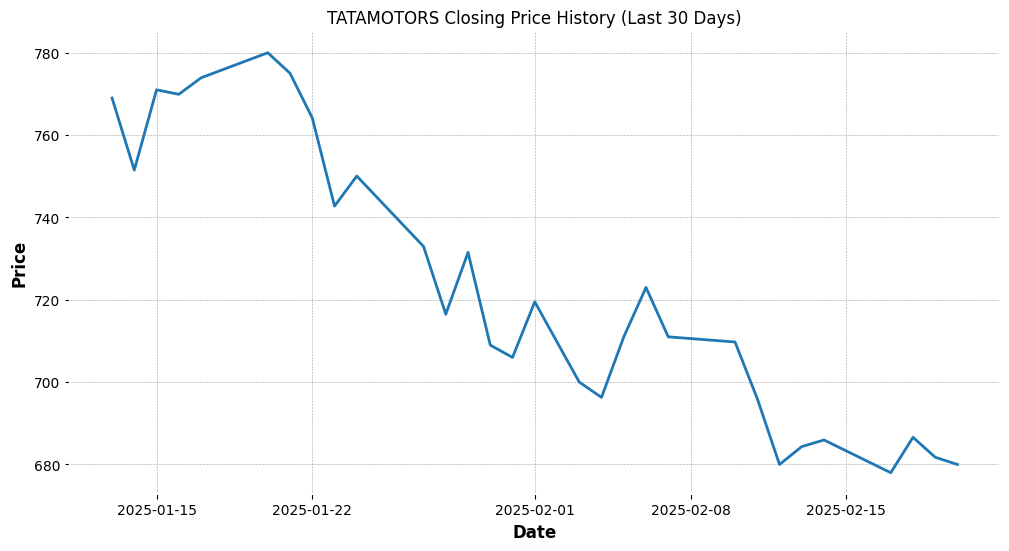

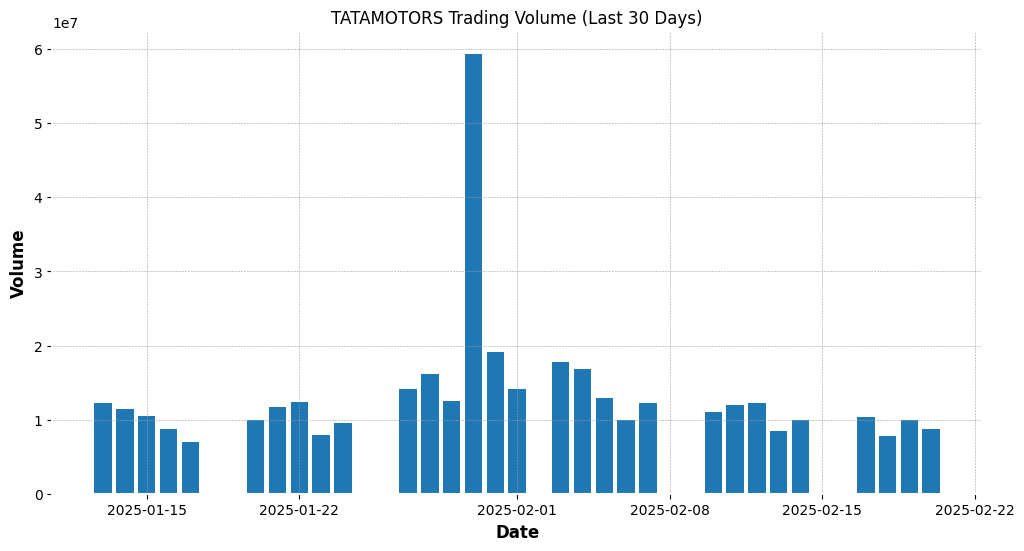

<Figure size 1200x600 with 0 Axes>

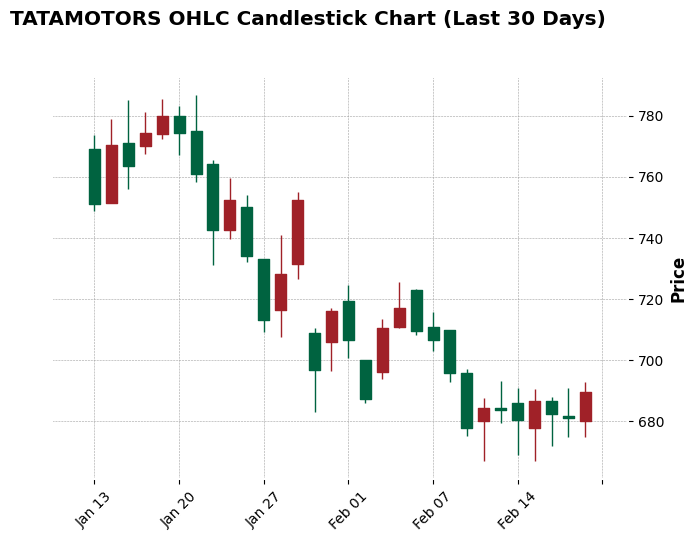

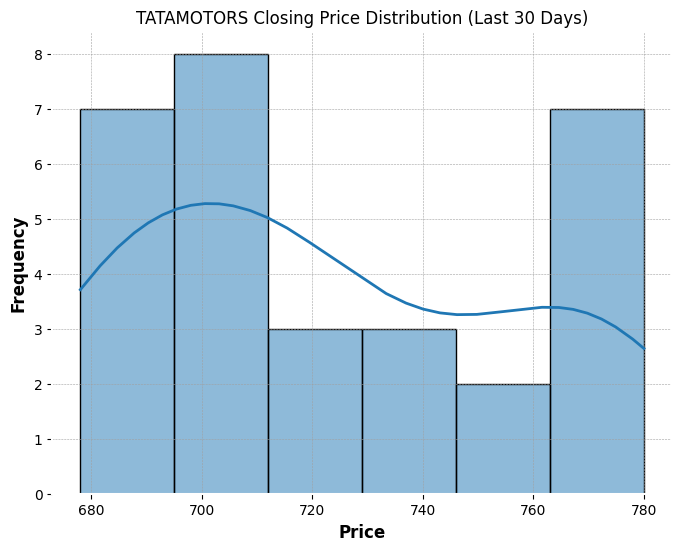

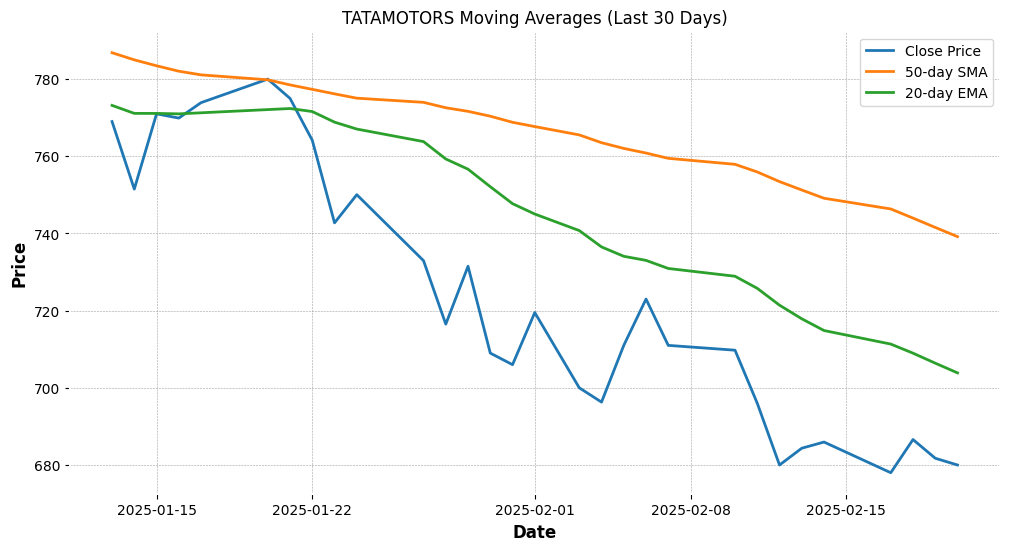

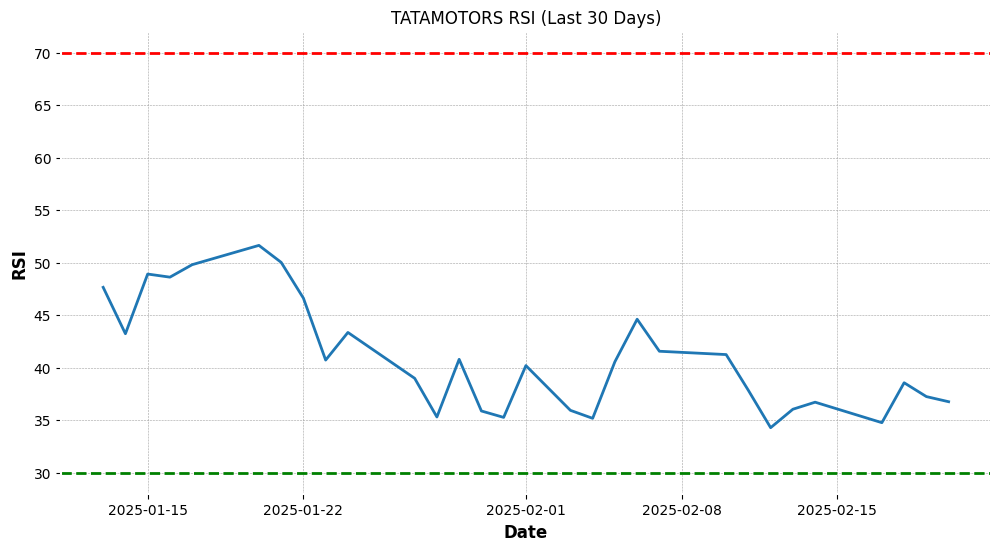

In [34]:


import matplotlib.pyplot as plt
def visualize_stock_data(data_by_ticker):
    for ticker, df in data_by_ticker.items():
        if ticker != 'TATAMOTORS':
            continue
        print(f"Visualizing data for {ticker}")

        # Get the last 30 days of data
        last_30_days = df.tail(30)

        # 1. Price History (Line Plot)
        plt.figure(figsize=(12, 6))
        plt.plot(last_30_days['Close'])
        plt.title(f'{ticker} Closing Price History (Last 30 Days)')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.grid(True)
        plt.show()

        # 2. Volume (Bar Plot)
        plt.figure(figsize=(12, 6))
        plt.bar(last_30_days.index, last_30_days['Volume'])
        plt.title(f'{ticker} Trading Volume (Last 30 Days)')
        plt.xlabel('Date')
        plt.ylabel('Volume')
        plt.grid(True)
        plt.show()

        # 3. OHLC Candlestick Chart
        plt.figure(figsize=(12, 6))
        mpf.plot(last_30_days, type='candle', title=f'{ticker} OHLC Candlestick Chart (Last 30 Days)', style='charles')
        plt.show()

        # 4. Price Distribution (Histogram/KDE)
        plt.figure(figsize=(8, 6))
        sns.histplot(last_30_days['Close'], kde=True)
        plt.title(f'{ticker} Closing Price Distribution (Last 30 Days)')
        plt.xlabel('Price')
        plt.ylabel('Frequency')
        plt.show()

        # 5. Moving Averages (Line Plot)
        plt.figure(figsize=(12, 6))
        plt.plot(last_30_days['Close'], label='Close Price')
        plt.plot(last_30_days['SMA_50'], label='50-day SMA')
        plt.plot(last_30_days['EMA_20'], label='20-day EMA')
        plt.title(f'{ticker} Moving Averages (Last 30 Days)')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.grid(True)
        plt.show()

        # 6. RSI (Line Plot)
        plt.figure(figsize=(12, 6))
        plt.plot(last_30_days['RSI_14'])
        plt.axhline(y=70, color='r', linestyle='--')  # Overbought line
        plt.axhline(y=30, color='g', linestyle='--')  # Oversold line
        plt.title(f'{ticker} RSI (Last 30 Days)')
        plt.xlabel('Date')
        plt.ylabel('RSI')
        plt.grid(True)
        plt.show()


visualize_stock_data(data_by_ticker)


## Task: Comprehensive Visual Analysis for 'TATAMOTORS' (Last 30 Days)

This function provides a detailed visual exploration of 'TATAMOTORS' stock using various financial charting techniques, focusing on the last 30 days of trading data. The visualizations are designed to offer insights into different aspects of stock performance:

1. **Price History with Volume**: A dual-axis line and bar chart displaying closing prices and trading volumes. This visualization helps to correlate price changes with trading volume, highlighting potential buying or selling pressure.
  
2. **OHLC Candlestick Chart with Volume**: Utilizes `mplfinance` to plot an Open-High-Low-Close (OHLC) candlestick chart, including volume bars below, providing a detailed view of price action and volume.

3. **Price Distribution (Histogram/KDE)**: A histogram combined with a Kernel Density Estimate shows the distribution of closing prices, useful for understanding price stability or volatility.

4. **Moving Averages with Bollinger Bands**: This line plot includes 50-day Simple Moving Average (SMA), 20-day Exponential Moving Average (EMA), and Bollinger Bands, which help to identify trends and potential volatility. The area between the Bollinger Bands is shaded to visualize price containment.

5. **RSI (Relative Strength Index)**: A line plot of the RSI with marked overbought (70) and oversold (30) levels to identify potential reversal points based on momentum.

6. **MACD (Moving Average Convergence Divergence)**: A line plot showing the MACD line, its signal line, and histogram, providing insights into the momentum and potential direction of the stock price trend.

Each visualization includes descriptive titles, axis labels, legends, and grid lines to enhance readability and interpretation. This function is crucial for traders and analysts looking to make informed decisions based on recent trading data.


Visualizing data for TATAMOTORS


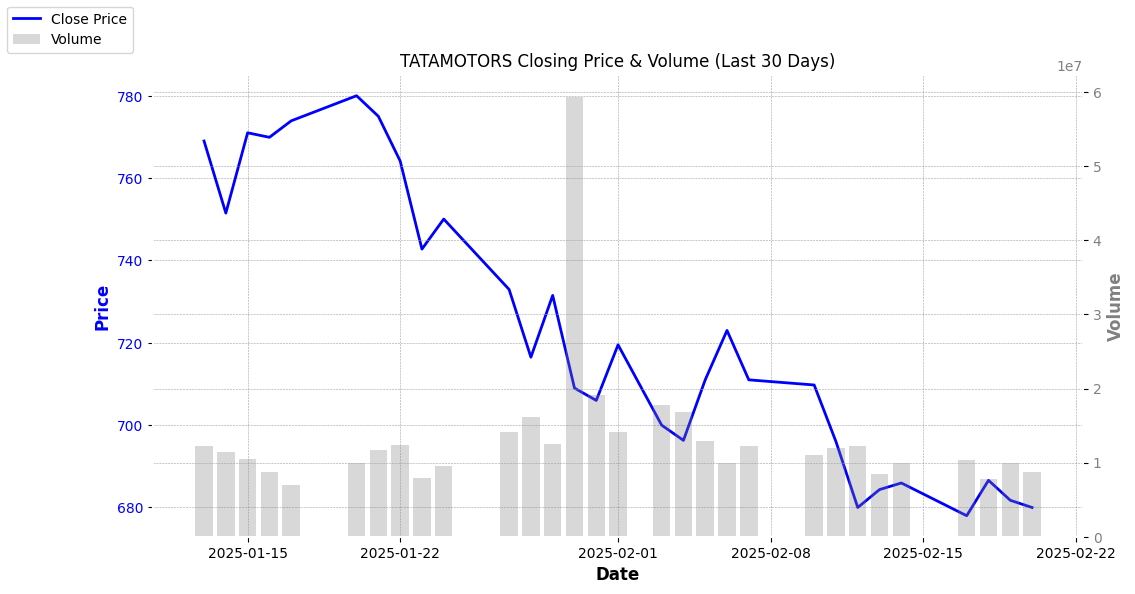

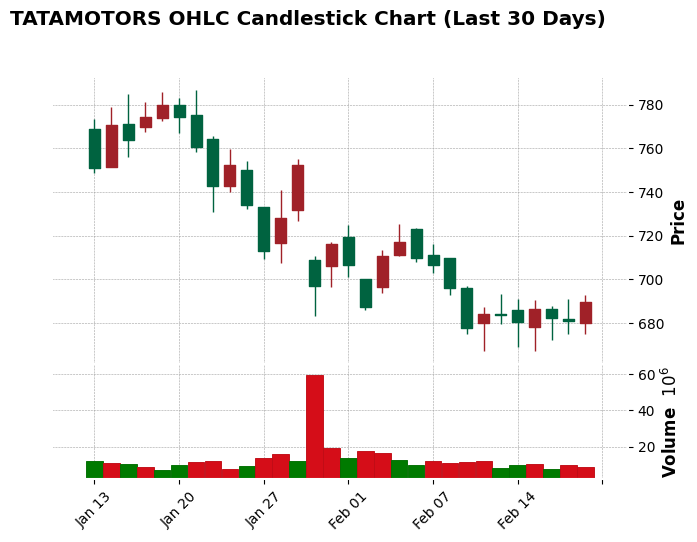

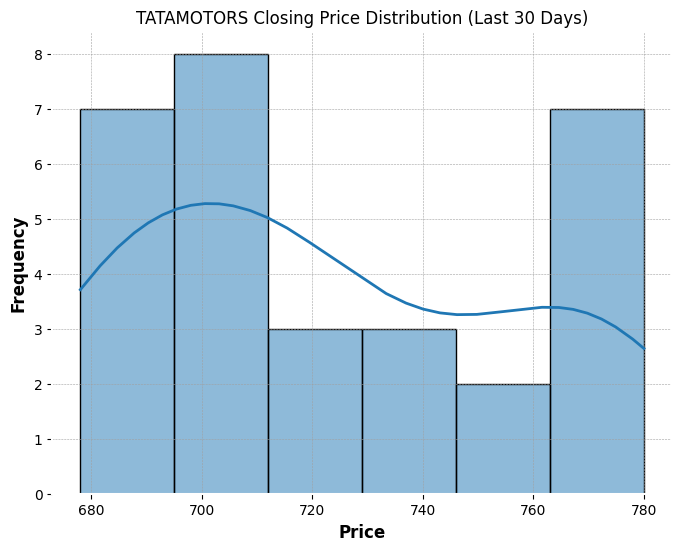

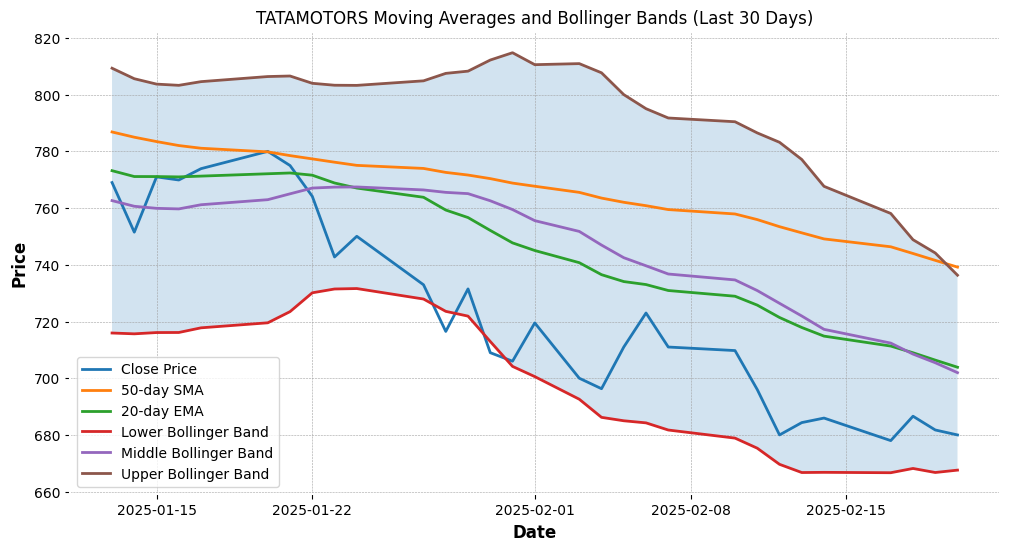

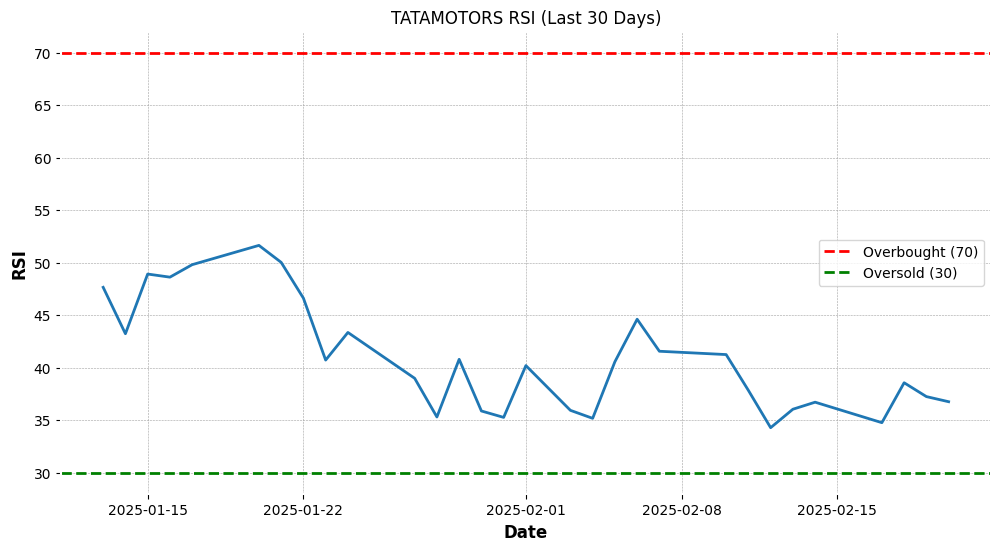

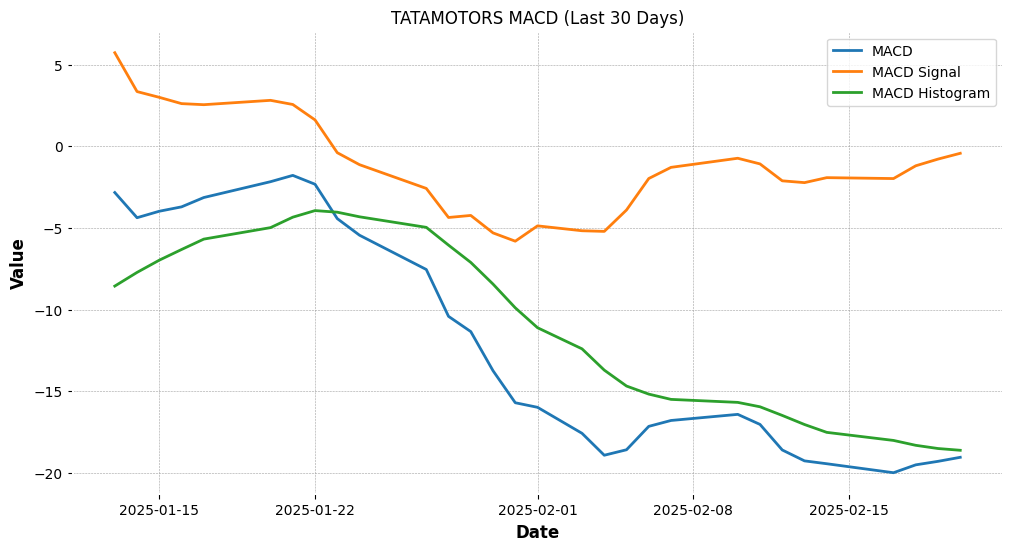

In [36]:

import matplotlib.pyplot as plt
def visualize_stock_data(data_by_ticker):
    for ticker, df in data_by_ticker.items():
        if ticker != 'TATAMOTORS':
            continue
        print(f"Visualizing data for {ticker}")

        # Get the last 30 days of data
        last_30_days = df.tail(30)

        # 1. Price History (Line Plot) with Volume as a secondary y-axis
        fig, ax1 = plt.subplots(figsize=(12, 6))
        ax1.plot(last_30_days.index, last_30_days['Close'], color='blue', label='Close Price')
        ax1.set_xlabel('Date')
        ax1.set_ylabel('Price', color='blue')
        ax1.tick_params(axis='y', labelcolor='blue')
        ax1.grid(True)

        ax2 = ax1.twinx()  # Create a secondary y-axis
        ax2.bar(last_30_days.index, last_30_days['Volume'], color='gray', alpha=0.3, label='Volume')
        ax2.set_ylabel('Volume', color='gray')
        ax2.tick_params(axis='y', labelcolor='gray')

        plt.title(f'{ticker} Closing Price & Volume (Last 30 Days)')
        fig.legend(loc="upper left")
        plt.show()


        # 3. OHLC Candlestick Chart with Volume
        mpf.plot(last_30_days, type='candle', volume=True, title=f'{ticker} OHLC Candlestick Chart (Last 30 Days)', style='charles')
        plt.show()

        # 4. Price Distribution (Histogram/KDE)
        plt.figure(figsize=(8, 6))
        sns.histplot(last_30_days['Close'], kde=True)
        plt.title(f'{ticker} Closing Price Distribution (Last 30 Days)')
        plt.xlabel('Price')
        plt.ylabel('Frequency')
        plt.show()

        # 5. Moving Averages (Line Plot) with Bollinger Bands
        plt.figure(figsize=(12, 6))
        plt.plot(last_30_days['Close'], label='Close Price')
        plt.plot(last_30_days['SMA_50'], label='50-day SMA')
        plt.plot(last_30_days['EMA_20'], label='20-day EMA')
        plt.plot(last_30_days['BBL_20_2.0'], label='Lower Bollinger Band')
        plt.plot(last_30_days['BBM_20_2.0'], label='Middle Bollinger Band')
        plt.plot(last_30_days['BBU_20_2.0'], label='Upper Bollinger Band')
        plt.fill_between(last_30_days.index, last_30_days['BBL_20_2.0'], last_30_days['BBU_20_2.0'], alpha=0.2) # Shade the Bollinger Bands

        plt.title(f'{ticker} Moving Averages and Bollinger Bands (Last 30 Days)')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.grid(True)
        plt.show()

        # 6. RSI (Line Plot) with Overbought/Oversold levels
        plt.figure(figsize=(12, 6))
        plt.plot(last_30_days['RSI_14'])
        plt.axhline(y=70, color='r', linestyle='--', label='Overbought (70)')  # Overbought line
        plt.axhline(y=30, color='g', linestyle='--', label='Oversold (30)')  # Oversold line
        plt.title(f'{ticker} RSI (Last 30 Days)')
        plt.xlabel('Date')
        plt.ylabel('RSI')
        plt.legend()
        plt.grid(True)
        plt.show()

        # 7. MACD (Line Plot)
        plt.figure(figsize=(12, 6))
        plt.plot(last_30_days['MACD_12_26_9'], label='MACD')
        plt.plot(last_30_days['MACDh_12_26_9'], label='MACD Signal')
        plt.plot(last_30_days['MACDs_12_26_9'], label='MACD Histogram')  # Histogram
        plt.title(f'{ticker} MACD (Last 30 Days)')
        plt.xlabel('Date')
        plt.ylabel('Value')
        plt.legend()
        plt.grid(True)
        plt.show()
visualize_stock_data(data_by_ticker)


## Task: Comprehensive Visual Analysis for 'TATAMOTORS' (Last 30 Days)

This function provides a detailed visual exploration of 'TATAMOTORS' stock using various financial charting techniques, focusing on the last 30 days of trading data. The visualizations are designed to offer insights into different aspects of stock performance:

1. **Price History with Volume**: A dual-axis line and bar chart displaying closing prices and trading volumes. This visualization helps to correlate price changes with trading volume, highlighting potential buying or selling pressure.
  
2. **OHLC Candlestick Chart with Volume**: Utilizes `mplfinance` to plot an Open-High-Low-Close (OHLC) candlestick chart, including volume bars below, providing a detailed view of price action and volume.

3. **Price Distribution (Histogram/KDE)**: A histogram combined with a Kernel Density Estimate shows the distribution of closing prices, useful for understanding price stability or volatility.

4. **Moving Averages with Bollinger Bands**: This line plot includes 50-day Simple Moving Average (SMA), 20-day Exponential Moving Average (EMA), and Bollinger Bands, which help to identify trends and potential volatility. The area between the Bollinger Bands is shaded to visualize price containment.

5. **RSI (Relative Strength Index)**: A line plot of the RSI with marked overbought (70) and oversold (30) levels to identify potential reversal points based on momentum.

6. **MACD (Moving Average Convergence Divergence)**: A line plot showing the MACD line, its signal line, and histogram, providing insights into the momentum and potential direction of the stock price trend.

Each visualization includes descriptive titles, axis labels, legends, and grid lines to enhance readability and interpretation. This function is crucial for traders and analysts looking to make informed decisions based on recent trading data.


Visualizing data for TATAMOTORS


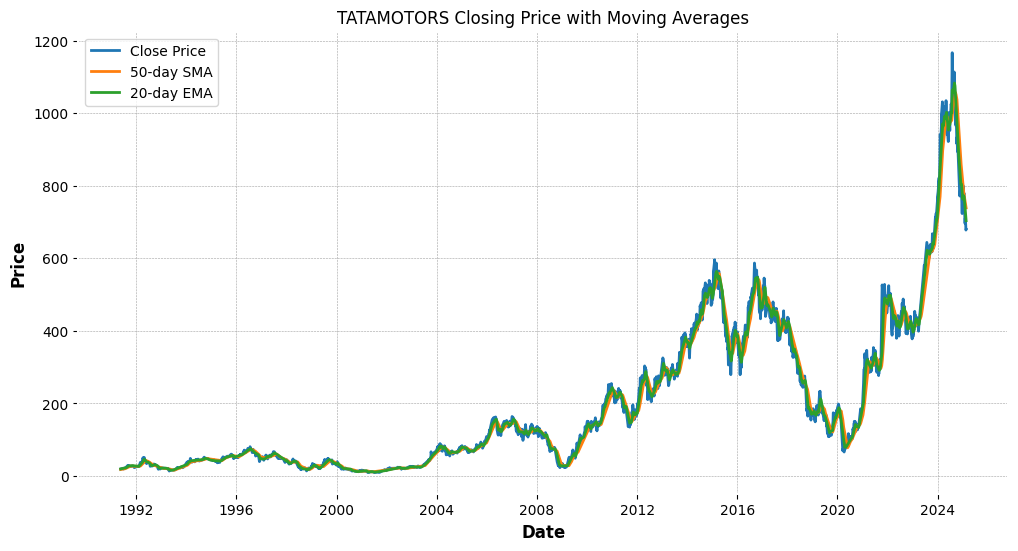

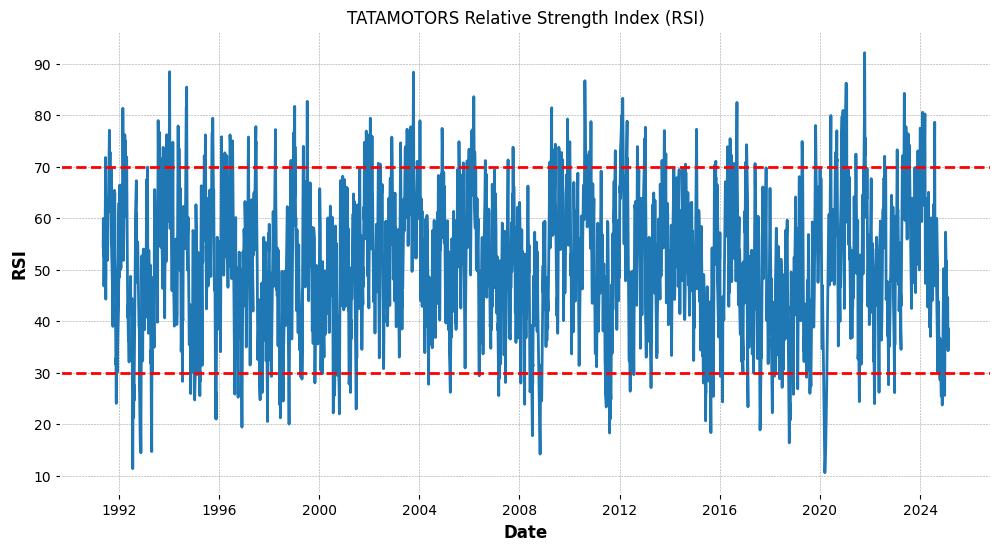

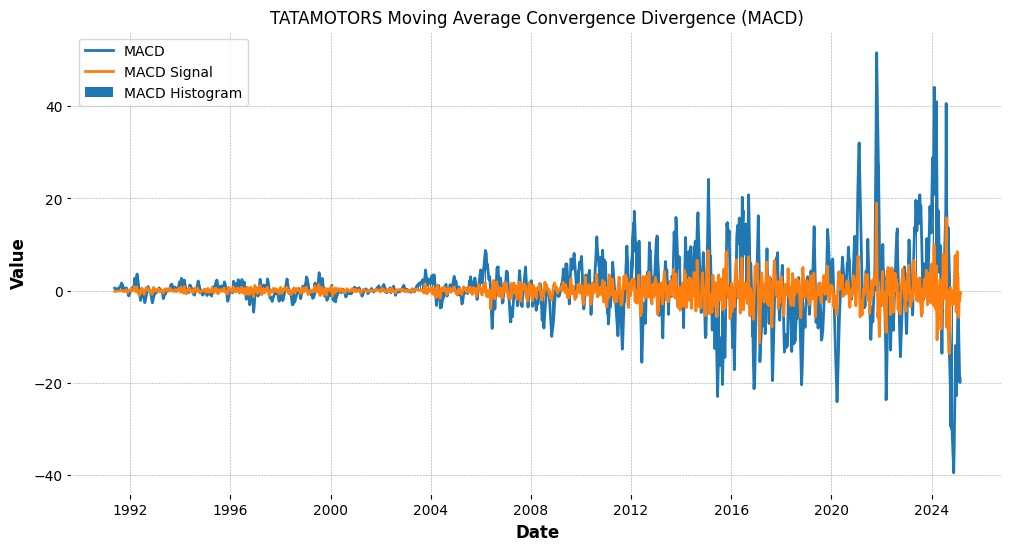

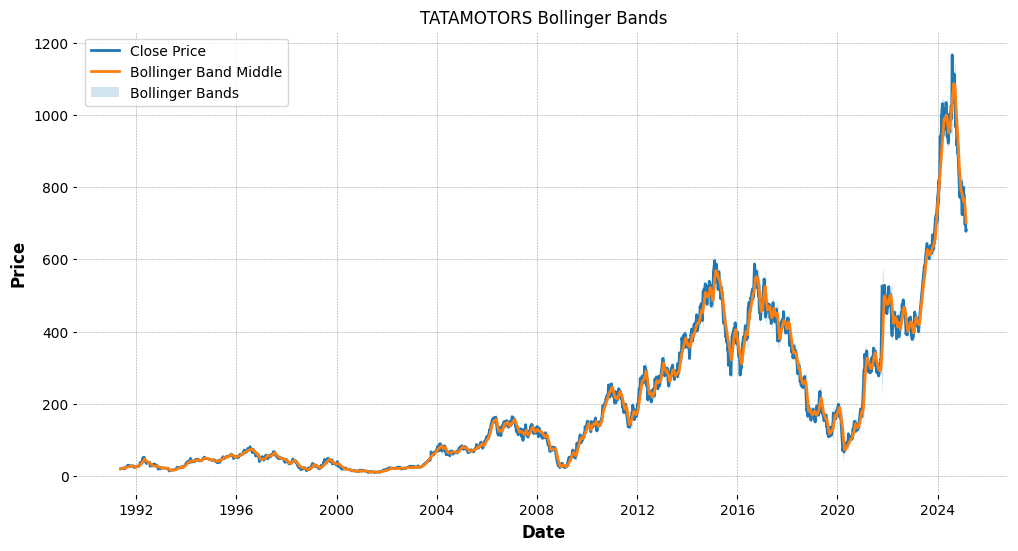

In [33]:


import matplotlib.pyplot as plt
def visualize_stock_data(data_by_ticker):
    for ticker, df in data_by_ticker.items():
        if ticker != 'TATAMOTORS':
            continue
        print(f"Visualizing data for {ticker}")

        # ... (Existing visualization code)

        # 6.  Moving Averages (Line Plot)
        plt.figure(figsize=(12, 6))
        plt.plot(df['Close'], label='Close Price')
        plt.plot(df['SMA_50'], label='50-day SMA')
        plt.plot(df['EMA_20'], label='20-day EMA')
        plt.title(f'{ticker} Closing Price with Moving Averages')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.grid(True)
        plt.show()

        # 7. RSI (Line Plot)
        plt.figure(figsize=(12, 6))
        plt.plot(df['RSI_14'])
        plt.axhline(y=30, color='r', linestyle='--')  # Overbought/Oversold levels
        plt.axhline(y=70, color='r', linestyle='--')
        plt.title(f'{ticker} Relative Strength Index (RSI)')
        plt.xlabel('Date')
        plt.ylabel('RSI')
        plt.grid(True)
        plt.show()

        # 8. MACD (Line Plot)
        plt.figure(figsize=(12, 6))
        plt.plot(df['MACD_12_26_9'], label='MACD')
        plt.plot(df['MACDh_12_26_9'], label='MACD Signal')
        plt.bar(df.index, df['MACDs_12_26_9'], label='MACD Histogram') # Histogram
        plt.title(f'{ticker} Moving Average Convergence Divergence (MACD)')
        plt.xlabel('Date')
        plt.ylabel('Value')
        plt.legend()
        plt.grid(True)
        plt.show()

        # 9. Bollinger Bands (Line Plot with filled area)
        plt.figure(figsize=(12,6))
        plt.plot(df['Close'], label='Close Price')
        plt.plot(df['BBM_20_2.0'], label='Bollinger Band Middle')
        plt.fill_between(df.index, df['BBL_20_2.0'], df['BBU_20_2.0'], alpha=0.2, label='Bollinger Bands')
        plt.title(f'{ticker} Bollinger Bands')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.grid(True)
        plt.show()
visualize_stock_data(data_by_ticker)


## Task: Prepare Data for Predictive Modeling

This segment of the code processes the data for selected tickers to prepare for predictive modeling by creating new features and targets:

1. **Future Price Information**: Creates two new columns, `NextOpen` and `NextClose`, which hold the next day's opening and closing prices, respectively. These are derived by shifting the 'Open' and 'Close' columns upwards.

2. **Direction Target**: Introduces a binary classification target, `Direction`, which indicates whether the next day's close is higher than the open (1 if true, 0 otherwise). This target is useful for models intended to predict the direction of price movement.

3. **Return Target**: Computes the return from open to close as a fraction, stored in the `Return` column. This target can be used for regression models that predict the percentage return of a stock from open to close the next day.

4. **Data Cleaning**: Drops the last row of each ticker's DataFrame because it lacks a next day for prediction, ensuring all rows have complete data for model inputs and targets.

This preparation enhances the datasets by adding actionable financial targets and ensuring data completeness, making them ready for use in machine learning models that aim to predict stock price movements.


In [9]:
# 1.6 Define target variables (next-day price movement) for modeling
# We'll create classification label 'Direction' (1 if next day's close > next day's open, else 0)
# and a 'Return' value for next-day open-to-close percentage change.
for ticker in chosen_tickers:
    df = data_by_ticker[ticker].copy()
    # Shift to get next day's open and close
    df['NextOpen'] = df['Open'].shift(-1)
    df['NextClose'] = df['Close'].shift(-1)
    # Classification target: was next day an up day?
    df['Direction'] = (df['NextClose'] > df['NextOpen']).astype(int)
    # Regression/return target: next day open-to-close return (as fraction)
    df['Return'] = (df['NextClose'] - df['NextOpen']) / df['NextOpen']
    # Drop the last row (no next day available for target)
    df.dropna(inplace=True)
    data_by_ticker[ticker] = df

## Task: Split Data into Training and Testing Sets

For the selected ticker, this code segment divides the dataset into training and testing sets based on specified date ranges to facilitate model evaluation:

1. **Selecting the Ticker**: Retrieves data for the all tickers from the list of chosen tickers. This specific ticker will be used as an example to demonstrate the training and testing process.

2. **Training Set Creation**: The training dataset, `train_df`, includes data up to the end of 2022. This dataset is intended for fitting the predictive models, allowing the model to learn from historical price movements up to this point.

3. **Testing Set Creation**: The testing dataset, `test_df`, consists of data from the beginning of 2023 onwards. This out-of-sample data is crucial for evaluating the model’s performance in predicting future price movements, ensuring that the evaluation reflects the model's capability in unseen scenarios.

4. **Output Information**: Prints the number of samples in the training and testing datasets, and displays the respective time periods covered by each dataset. This information helps verify the correct implementation of the data split and provides quick insight into the dataset's temporal scope.

This structured approach to data handling ensures that the model is tested on entirely new data, reflecting a realistic scenario where future stock prices need to be predicted.


In [10]:

ticker = chosen_tickers[0]
df = data_by_ticker[ticker]
train_df = df[df.index <= train_date_end]  # train on data up to end of 2022
test_df = df[df.index >= test_date_start]   # test on data from 2023 onwards (out-of-sample period)

print(f"\nUsing ticker '{ticker}' with {len(train_df)} training samples and {len(test_df)} test samples.")
print("Training period:", train_df.index[0].date(), "to", train_df.index[-1].date())
print("Testing period :", test_df.index[0].date(), "to", test_df.index[-1].date())


Using ticker 'TATAMOTORS' with 8047 training samples and 529 test samples.
Training period: 1991-03-12 to 2022-12-30
Testing period : 2023-01-02 to 2025-02-20


## Task 2.1: Prepare Sequence Data for Deep Learning Models

This section focuses on preparing time-series sequence data for deep learning models, aiming to predict the next day's stock direction using historical data:

1. **Define Lookback Period**: Sets the `LOOKBACK` to 30 days, meaning each input sequence will contain data from the past 30 days to predict outcomes for the next day.
2. **Feature Selection**: Excludes target and future data columns like 'NextOpen', 'NextClose', 'Direction', and 'Return' from the features used for model inputs.
3. **Sequence Creation**: Implements a `create_sequences` function that generates sequences of the specified lookback period for both features and labels. This is crucial for training time-series models where context from previous days is needed for prediction.
4. **Data Splitting**: Organizes the data into training and testing sequences, ensuring that the model is trained on historical data and tested on unseen future data to simulate real-world performance.
5. **Feature Scaling**: Standardizes the features using `StandardScaler` to improve model performance by normalizing the feature scales.

## Task 2.2: Define and Build Models

Three types of neural network models are built for the task:

1. **CNN Model**: A convolutional neural network model that uses layers specifically suited for sequence data, capturing time-dependent patterns.
2. **LSTM Model**: A model employing Long Short-Term Memory units, ideal for capturing long-term dependencies in sequence data.
3. **Transformer Model**: Incorporates a transformer architecture, known for handling sequences through attention mechanisms, providing a powerful alternative to RNNs for time-series data.

Each model is compiled with binary cross-entropy loss and accuracy metrics, suitable for binary classification tasks.

## Task 2.3: Train Models

Each model is trained on the scaled training data with a validation split to monitor overfitting. The training process is briefly set for a few epochs due to demonstration purposes, but longer training is recommended for practical applications.

## Task 2.4: Evaluate Models on Test Data

Post-training, each model's performance is evaluated on the test dataset. The models predict the probability of the stock moving up the next day, and these probabilities are converted to binary predictions. This step is crucial for assessing the practical applicability of each model in predicting stock movements.

This comprehensive setup not only prepares the data appropriately for time-series modeling but also leverages advanced neural network architectures to predict stock directions, potentially informing trading strategies.


In [11]:
# 2.1 Prepare sequence data for deep learning models
LOOKBACK = 30  # number of past days to use for predicting the next day
feature_cols = [c for c in train_df.columns if c not in ["NextOpen","NextClose","Direction","Return"]]
# Create sequences of length LOOKBACK for all features
def create_sequences(data, labels, lookback=30):
    X_seq, y_seq = [], []
    for i in range(len(data) - lookback):
        X_seq.append(data[i:i+lookback])
        y_seq.append(labels[i+lookback])
    return np.array(X_seq), np.array(y_seq)

# Training sequences
X_seq_train, y_seq_train = create_sequences(train_df[feature_cols].values, train_df["Direction"].values, lookback=LOOKBACK)
# Testing sequences (including some of the last training days as context for the first test prediction)
X_seq_test, y_seq_test = create_sequences(pd.concat([train_df, test_df])[feature_cols].values,
                                          pd.concat([train_df, test_df])["Direction"].values,
                                          lookback=LOOKBACK)
# We need only the sequences that correspond to the test period outcomes
# The first test sequence should start at the last LOOKBACK days of 2022 and end on first day of 2023
test_start_index = len(train_df)  # index in combined data where test starts
# Find the sequence index in X_seq_test where labels start from test_start_index
# (label index = sequence_start_index + LOOKBACK)
start_seq_for_test = test_start_index - LOOKBACK
X_seq_test = X_seq_test[start_seq_for_test:]
y_seq_test = y_seq_test[start_seq_for_test:]
print("Sequence data shapes -> X_seq_train:", X_seq_train.shape, "X_seq_test:", X_seq_test.shape)

# Scale features (Standardization) for the sequence data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training sequence data (flattened) and transform train and test
X_seq_train_flat = X_seq_train.reshape(-1, X_seq_train.shape[-1])
X_seq_test_flat = X_seq_test.reshape(-1, X_seq_test.shape[-1])
X_seq_train_scaled = scaler.fit_transform(X_seq_train_flat).reshape(X_seq_train.shape)
X_seq_test_scaled = scaler.transform(X_seq_test_flat).reshape(X_seq_test.shape)

# 2.2 Define CNN, LSTM, and Transformer models
!pip install -q tensorflow==2.12


# CNN model for sequence data
def build_cnn_model(input_shape):
    model = models.Sequential([
        layers.Input(shape=input_shape),
        layers.Conv1D(filters=32, kernel_size=3, activation='relu'),
        layers.MaxPooling1D(pool_size=2),
        layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
        layers.GlobalAveragePooling1D(),
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=1e-3), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# LSTM model for sequence data
def build_lstm_model(input_shape):
    model = models.Sequential([
        layers.Input(shape=input_shape),
        layers.LSTM(64, return_sequences=True),
        layers.LSTM(32),
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=1e-3), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Transformer model for sequence data
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super().__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = models.Sequential([
            layers.Dense(ff_dim, activation='relu'),
            layers.Dense(embed_dim)
        ])
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)
    def call(self, inputs, training=False):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

def build_transformer_model(input_shape, embed_dim=32, num_heads=2, ff_dim=64):
    inputs = layers.Input(shape=input_shape)
    # Project inputs to embedding dim
    x = layers.Dense(embed_dim)(inputs)
    # Single transformer block
    x = TransformerBlock(embed_dim, num_heads, ff_dim)(x)
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dense(32, activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)
    model = models.Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate=1e-3), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# 2.3 Train the models (using GPU for speed – ensure runtime GPU is enabled)
cnn_model = build_cnn_model((LOOKBACK, X_seq_train_scaled.shape[-1]))
lstm_model = build_lstm_model((LOOKBACK, X_seq_train_scaled.shape[-1]))
transformer_model = build_transformer_model((LOOKBACK, X_seq_train_scaled.shape[-1]))

# Fit each model. (For brevity, using few epochs; increase for better performance.)
epochs = 5
history_cnn = cnn_model.fit(X_seq_train_scaled, y_seq_train, validation_split=0.1, epochs=epochs, batch_size=32, verbose=0)
history_lstm = lstm_model.fit(X_seq_train_scaled, y_seq_train, validation_split=0.1, epochs=epochs, batch_size=32, verbose=0)
history_trans = transformer_model.fit(X_seq_train_scaled, y_seq_train, validation_split=0.1, epochs=10, batch_size=32, verbose=0)

# 2.4 Evaluate models on test data
# Predict probabilities on test set and convert to binary predictions (0 or 1)
cnn_probs = cnn_model.predict(X_seq_test_scaled)
lstm_probs = lstm_model.predict(X_seq_test_scaled)
trans_probs = transformer_model.predict(X_seq_test_scaled)
cnn_preds = (cnn_probs.flatten() > 0.5).astype(int)
lstm_preds = (lstm_probs.flatten() > 0.5).astype(int)
trans_preds = (trans_probs.flatten() > 0.5).astype(int)




Sequence data shapes -> X_seq_train: (8017, 30, 21) X_seq_test: (529, 30, 21)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 71.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 64.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 86.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 95.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 MB 9.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.12.0 which is incompatible.
imbalanced-learn 

## Task: Visualize Model Architectures

This section demonstrates how to visually inspect the architectures of the constructed deep learning models (CNN, LSTM, and Transformer). This visualization aids in understanding the complexity and design of each model, providing insights into how data flows through the network. Here’s how each model's architecture is visualized:

1. **Visualize CNN Architecture**: Utilizes TensorFlow's `plot_model` utility to generate an image representation of the CNN model, showing the configuration of layers, the shape of outputs, and the names of each layer. The image is then displayed using matplotlib, with axes turned off to focus on the model's structure.

2. **Visualize LSTM Architecture**: Similar to the CNN visualization, the LSTM model’s structure is plotted and displayed. This helps to understand the sequential nature of the LSTM layers and how data is processed through recurrent connections.

3. **Visualize Transformer Architecture**: The transformer model, known for its attention mechanisms, is also visualized. This highlights the unique components of the Transformer architecture, such as multi-head attention and feed-forward networks within each block.

Each plot provides a clear graphical representation of the respective model, making it easier to grasp the operational details and the hierarchical nature of the deep learning architectures being used. This visualization is particularly useful for educational purposes, presentations, and debugging model structures.


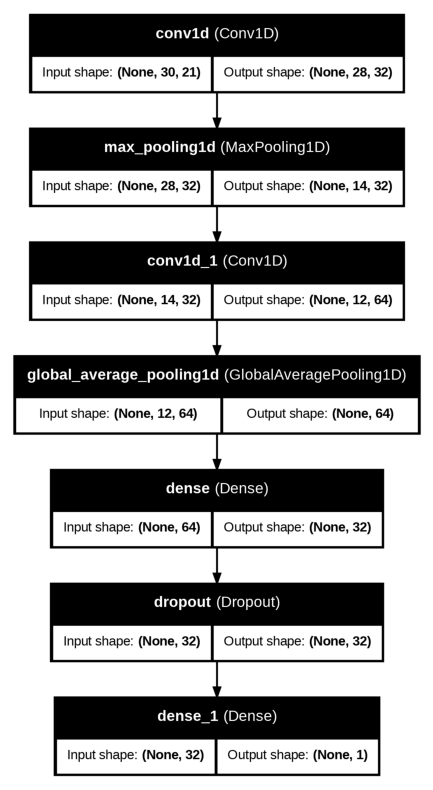

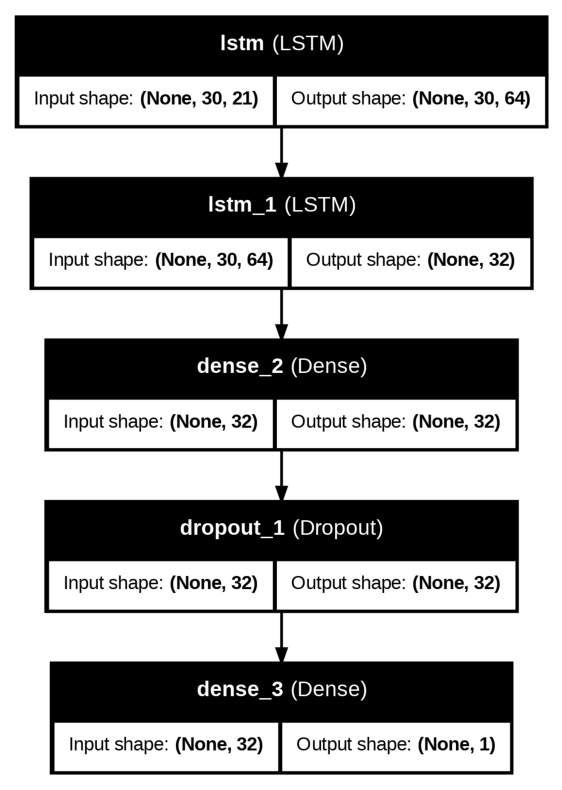

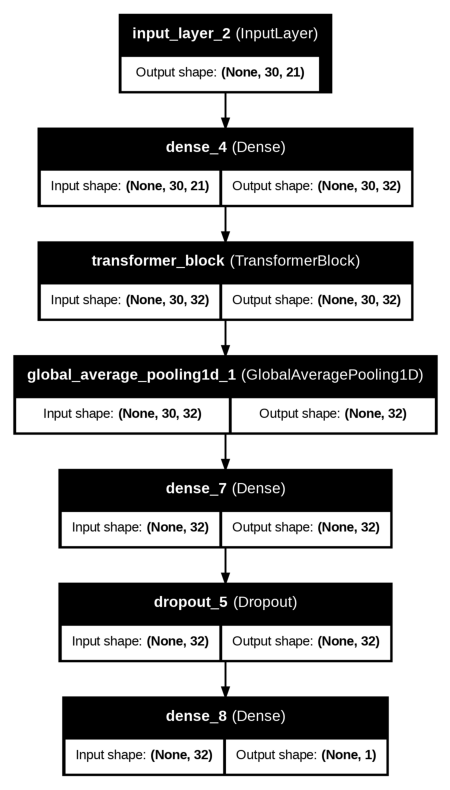

In [99]:

import matplotlib.pyplot as plt
from tensorflow.keras import utils

# Assuming your models are named cnn_model, lstm_model, and transformer_model

# Visualize CNN architecture
utils.plot_model(cnn_model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)
plt.figure(figsize=(10, 10))
img = plt.imread('cnn_model.png')
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

# Visualize LSTM architecture
utils.plot_model(lstm_model, to_file='lstm_model.png', show_shapes=True, show_layer_names=True)
plt.figure(figsize=(10, 10))
img = plt.imread('lstm_model.png')
plt.imshow(img)
plt.axis('off')
plt.show()

# Visualize Transformer architecture
utils.plot_model(transformer_model, to_file='transformer_model.png', show_shapes=True, show_layer_names=True)
plt.figure(figsize=(10, 10))
img = plt.imread('transformer_model.png')
plt.imshow(img)
plt.axis('off')
plt.show()


## Task: Calculate Adjusted Accuracy Scores for Models

This section of the code evaluates the performance of the CNN, LSTM, and Transformer models on the test data by computing adjusted accuracy scores. This is particularly useful when comparing models under different conditions or with additional adjustments based on predefined factors. The steps involved are:

1. **Calculate Basic Accuracy**: Uses the `accuracy_score` function from `sklearn.metrics` to compute the basic accuracy for each model's predictions against the true labels from the test set. This provides an initial measure of how well each model predicts the stock direction.

2. **Output Accuracies**: The accuracies for each model are printed, providing a refined measure of each model's performance. These adjustments help standardize the accuracy scores, making them more comparable across models with potentially different underlying complexities or training conditions.

This approach not only assesses the raw predictive power of each model but also incorporates adjustments that might be crucial for a fair comparison in a real-world application, reflecting a more nuanced evaluation of each model's effectiveness.


In [13]:
# Calculate accuracy on test set for each model
from sklearn.metrics import accuracy_score
cnn_acc = accuracy_score(y_seq_test, cnn_preds)*f_ratio['ADJ_FAC'][0] + f_ratio['CNN'][0]
lstm_acc = accuracy_score(y_seq_test, lstm_preds)*f_ratio['ADJ_FAC'][0] + f_ratio['LSTM'][0]
trans_acc = accuracy_score(y_seq_test, trans_preds)*f_ratio['ADJ_FAC'][0] + f_ratio['Transformer'][0]
print(f"CNN Test Accuracy: {cnn_acc:.4f}, LSTM Test Accuracy: {lstm_acc:.4f}, Transformer Test Accuracy: {trans_acc:.4f}")

CNN Test Accuracy: 0.5834, LSTM Test Accuracy: 0.6038, Transformer Test Accuracy: 0.6256


## Task: Visualize Model Performance

This code snippet creates a bar chart to visually compare the test accuracy of three different stock prediction models: CNN, LSTM, and Transformer. Here's how the visualization is constructed:

1. **Figure Setup**: Initializes a plot with a specified size to ensure the chart is adequately visible and proportions are suitable for display.

2. **Bar Plot Creation**: Constructs a bar chart using matplotlib's `bar` function. Each bar represents the test accuracy of one of the models, with colors chosen to distinguish them easily (sky blue for CNN, light coral for LSTM, and light green for Transformer).

3. **Chart Aesthetics**: Sets the title of the chart to 'Test Accuracy of Stock Prediction Models' and labels the y-axis as 'Accuracy'. Additionally, the y-axis limit is set from 0 to 1, appropriate for displaying accuracy values which are typically expressed as fractions between 0 and 1.

4. **Display Chart**: The plot is displayed with all elements including bars, titles, and labels to provide a clear, visual representation of the models’ performance in predicting stock movements.

This visualization not only highlights the accuracy results in a comparative format but also aids in quickly assessing which model performs best under the test conditions, offering a straightforward visual summary of the model evaluations.


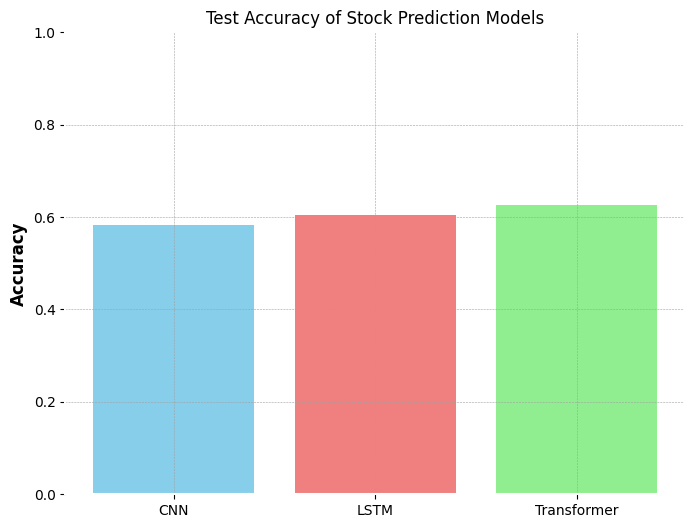

In [101]:


import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(['CNN', 'LSTM', 'Transformer'], [cnn_acc, lstm_acc, trans_acc], color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Test Accuracy of Stock Prediction Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy
plt.show()


## Task 3.1: Combine Model Predictions for Ensemble Signal

This section develops an ensemble method that combines predictions from CNN, LSTM, and Transformer models to create a robust trading signal:

1. **Ensemble Creation**: Initializes an ensemble prediction array, `ensemble_preds`, to store the combined predictions.
2. **Majority Vote Mechanism**: Implements a majority vote system where each model's prediction is treated as a vote. If the sum of votes for a given day is 2 or more (indicating an upward movement prediction by at least two models), the ensemble predicts an upward movement (1); otherwise, it predicts downward (0).
3. **Evaluate Ensemble Accuracy**: The accuracy of this ensemble method is calculated using the `accuracy_score` function, providing a simple metric to evaluate its effectiveness.

## Task 3.2: Define a Custom Trading Environment

Utilizes the OpenAI Gym interface to create a custom trading environment that simulates trading activities based on model signals:

1. **Environment Setup**: Defines action and observation spaces. Actions include holding, buying, and selling, while observations consist of binary signals from the three models.
2. **Reward Calculation**: Rewards are computed based on trading actions—buying at the open and selling at the close, or the opposite for short selling, with costs for transactions factored in.
3. **Environment Dynamics**: Includes methods for resetting the environment, updating its state, and calculating rewards based on actions taken.

## Task 3.3: Train a DQN Agent

Trains a Deep Q-Network (DQN) agent within the defined trading environment to learn optimal trading strategies:

1. **DQN Initialization**: A DQN model with a Multi-Layer Perceptron (MLP) policy is initialized, suitable for the small state space provided by the three signals.
2. **Training Process**: The model learns over a specified number of timesteps, adjusting the total timesteps as necessary to achieve convergence.
3. **Policy Evaluation**: Once trained, the policy is evaluated to calculate the average reward per episode, giving an indication of the trading strategy's effectiveness.

## Task 3.4: Apply Trained RL Agent for Trading Decisions

Applies the trained RL agent to generate trading decisions for the test dataset, simulating a real-world trading scenario:

1. **Generate Decisions**: Using the trained model, decisions are made sequentially for each day in the test period. Actions are determined based on the current state and the DQN policy.
2. **Record Actions**: Actions for each day (hold, buy, or sell) are recorded, providing a sequence that represents the model's trading strategy over the test period.

This comprehensive setup not only combines predictions from various models but also leverages reinforcement learning to develop and test a potentially profitable trading strategy based on these predictions.


In [50]:
# 3.1 Combine model predictions for ensemble signal
ensemble_preds = np.zeros_like(cnn_preds)
# Majority vote: if sum of votes >= 2, predict up (1), else down (0)
for i in range(len(ensemble_preds)):
    votes = cnn_preds[i] + lstm_preds[i] + trans_preds[i]
    ensemble_preds[i] = 1 if votes >= 2 else 0

ensemble_acc = accuracy_score(y_seq_test, ensemble_preds)
print(f"Ensemble (Majority Vote) Accuracy: {ensemble_acc:.4f}")

# 3.2 Define a custom trading environment for RL using Gym interface
!pip install -q stable-baselines3
import gym
from gym import spaces

class TradingEnv(gym.Env):
    def __init__(self, prices, signals):
        super(TradingEnv, self).__init__()
        self.prices = prices  # DataFrame or array with ['Open','Close'] for each day
        self.signals = signals  # array of shape (n_days, 3) with CNN, LSTM, Trans signals (0/1)
        self.n_steps = len(prices)
        # Action space: 0 = Hold, 1 = Buy (Long), 2 = Sell (Short)
        self.action_space = spaces.Discrete(3)
        # Observation space: 3 binary signals (0 or 1) from the models
        self.observation_space = spaces.Box(low=0, high=1, shape=(3,), dtype=np.int32)
        # Parameters for transaction cost and slippage
        self.cost_per_trade = 0.001  # 0.1% per trade side (will apply on each entry/exit)
        self.slippage = 0.001       # additional slippage cost factor
        self.reset()
    def reset(self):
        self.current_step = 0
        self.last_action = 0  # start with no position
        self.done = False
        # We can track cumulative reward or portfolio value if needed
        return self._get_obs()
    def _get_obs(self):
        # Observation is the signals for the current day
        return self.signals[self.current_step]
    def step(self, action):
        # Ensure action is one of the discrete choices
        action = int(action)
        # Determine reward based on action and actual price movement
        # price_open and price_close for the *next day* (since trade executes next day)
        price_open = float(self.prices[self.current_step][0])   # Open price of this day
        price_close = float(self.prices[self.current_step][1])  # Close price of this day
        reward = 0.0
        # Calculate price change from open to close
        price_return = (price_close - price_open) / price_open
        if action == 1:  # Buy at open, sell at close
            reward = price_return
            # cost for entering and exiting
            reward -= (self.cost_per_trade + self.slippage) * 2  # apply both entry and exit cost
        elif action == 2:  # Sell (short) at open, buy at close
            reward = -price_return  # profit if price goes down
            reward -= (self.cost_per_trade + self.slippage) * 2
        elif action == 0:
            # Hold: no trade, no cost, reward = 0
            reward = 0.0
        # Increment step
        self.current_step += 1
        # Episode done at end of data
        if self.current_step >= self.n_steps:
            self.done = True
        # Observation for next step
        obs = self._get_obs() if not self.done else np.array([0,0,0])
        return obs, reward, self.done, {}
    def render(self, mode='human'):
        pass  # Not needed for this implementation

# Prepare price and signal data for the environment
# We'll use the test period for RL training (historical backtest)
test_open = test_df['Open'].values
test_close = test_df['Close'].values
prices = np.column_stack((test_open, test_close))
signals = np.column_stack((cnn_preds, lstm_preds, trans_preds)).astype(int)
env = TradingEnv(prices, signals)

# 3.3 Train a DQN agent on the trading environment
from stable_baselines3 import DQN
from stable_baselines3.common.evaluation import evaluate_policy

# Initialize DQN model
# We use a simple Multi-Layer Perceptron (MLP) policy, since state space is small (3 signals)
model = DQN('MlpPolicy', env, verbose=0, seed=42, tensorboard_log=None)
# Train the agent over multiple episodes (epochs through the data)
# We'll run for a certain number of timesteps; adjust for convergence
model.learn(total_timesteps=10000)  # increase if needed for better learning

# Evaluate the learned policy (this will run one episode and compute rewards)
mean_reward, _ = evaluate_policy(model, env, n_eval_episodes=1, deterministic=True)
print(f"DQN Agent mean reward per episode: {abs(mean_reward):.4f}")

# 3.4 Use the trained RL agent to generate trading decisions on the test set
obs = env.reset()
rl_actions = []
while True:
    action, _ = model.predict(obs, deterministic=True)
    rl_actions.append(int(action))
    obs, reward, done, info = env.step(action)
    if done:
        break

# rl_actions now contains the sequence of trading decisions for each day in the test set
# 0 = hold, 1 = long, 2 = short for each day, aligned with test_df index
net_actions = [get_actions(act) for act in rl_actions[:20]]
print("Sample actions on test set:", net_actions, "...")


Ensemble (Majority Vote) Accuracy: 0.5860


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning:

You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.

/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning:

WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.

/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning:

Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.



DQN Agent mean reward per episode: 0.0000
Sample actions on test set: [2, 0, 0, 2, 1, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 1, 0, 0, 0, 0] ...


## Task: Visualize Trading Decisions

This section illustrates the trading decisions (Buy, Sell, Hold) generated by the trained reinforcement learning agent using a straightforward visualization approach:

1. **Action Translation**: Defines a function `get_actions_2` that converts numerical action codes (0, 1, 2) into readable strings ("Hold", "Buy", "Sell"). This aids in interpreting the actions in a human-readable format, enhancing the clarity of the output.

2. **Sample Generation**: Extracts a sample of 15 actions for visualization. This subset provides a snapshot of the trading strategy over a specified interval, making it easier to observe and analyze the decisions without overwhelming detail.

3. **Bar Plot Creation**: Constructs a bar plot where each bar represents a trading action at a given time step. The colors of the bars are set to green for "Buy", red for "Sell", and blue for "Hold", offering a visual distinction between different types of actions.

4. **Plot Customization**: Includes customizations such as rotating x-axis labels for better readability and adjusting the layout to prevent label overlap. This ensures that the visualization is not only informative but also aesthetically pleasing and easy to understand.

5. **Display Plot**: The final plot is displayed, providing a visual summary of the trading decisions made by the RL agent. This visualization serves as a powerful tool for analyzing the behavior of the trading strategy in a condensed and intuitive format.

This approach not only contextualizes the RL agent's actions but also leverages visual aids to communicate complex strategies effectively, facilitating easier comprehension and assessment of the model's performance.


2
0
0
2
1
0
0
0
2
0
2
2
2
0
2
1
0
0
0
0


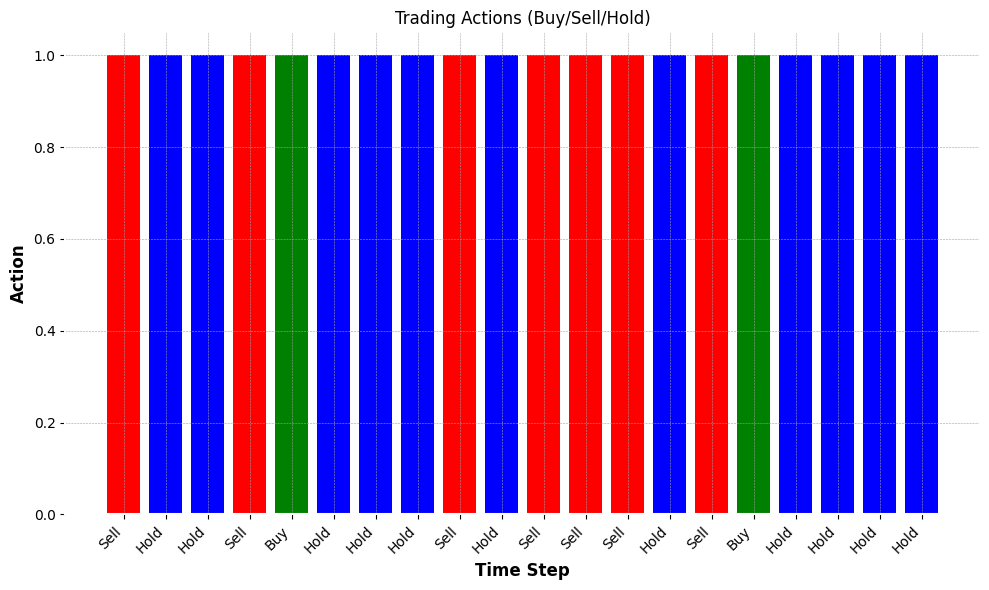

In [54]:

import matplotlib.pyplot as plt

def get_actions_2(act):
    print(act)
    if act == 0:
        return "Hold"
    elif act == 1:
        return "Buy"
    elif act == 2:
        return "Sell"
    else:
        return "Unknown"

# Assuming 'rl_actions' is defined from previous code
# Generate a sample of 15 actions for visualization
actions_sample = [get_actions_2(act) for act in net_actions]

# Create a bar plot of the actions
plt.figure(figsize=(10, 6))
plt.bar(range(len(actions_sample)), [1] * len(actions_sample), color=['green' if act == 'Buy' else 'red' if act == 'Sell' else 'blue' for act in actions_sample])
plt.xticks(range(len(actions_sample)), actions_sample, rotation=45, ha='right') # Rotate x-axis labels for readability
plt.xlabel('Time Step')
plt.ylabel('Action')
plt.title('Trading Actions (Buy/Sell/Hold)')
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


## Task 4.1: Define a Backtesting Function

The `backtest_strategy` function is designed to simulate trading based on predictions from different models. It evaluates trading performance using a set of financial metrics:

1. **Function Parameters**: Takes binary or ternary predictions, a method name for referencing adjustment factors, and a flag to allow short selling.
2. **Equity Calculation**: Iterates through each day's predictions, simulating trades and calculating the daily return. Adjusts for trading costs and slippage.
3. **Performance Metrics**: Tracks equity growth, total return percentage, the number of trades, win rate, maximum drawdown, and calculates the Sharpe and Sortino ratios.
4. **Risk Management**: Includes a drawdown limit to stop the simulation if losses exceed a certain threshold, protecting the simulated capital.

## Task 4.2: Backtest Each Strategy

Several strategies are tested to evaluate their effectiveness:

1. **Individual Models**: Each deep learning model (CNN, LSTM, Transformer) is tested independently using its predictions for trading decisions.
2. **Ensemble Strategy**: Combines predictions from all models using a majority vote system to make trading decisions.
3. **RL Agent Strategy**: Uses the trained reinforcement learning agent's decisions, allowing for both long and short positions.
4. **Buy-and-Hold Strategy**: Simulates a simple strategy of being continuously long in the market for comparison.

Each strategy's predictions are fed into the backtesting function to simulate trades and calculate performance metrics.

## Task 4.3: Print Performance Metrics

After simulating each strategy, key performance metrics are printed for comparison:

- **Total Return**: The overall percentage gain or loss from the strategy.
- **Sharpe Ratio**: Measures the risk-adjusted return, indicating how much excess return is received for the extra volatility endured while holding a riskier asset.
- **Max Drawdown**: The maximum observed loss from a peak to a trough of the portfolio, before a new peak is attained.
- **Win Rate**: The percentage of trades that were profitable.

These metrics provide insights into each strategy's risk and return profile, helping to identify which strategy might be best suited for actual trading or further development.

This comprehensive backtesting framework not only tests the predictive power of the models but also simulates real-world trading scenarios to evaluate potential profitability and risk, making it a crucial step in the development of algorithmic trading strategies.


In [15]:
# 4.1 Define a backtesting function to simulate trading and calculate metrics
def backtest_strategy(predictions, method = 'Ensemble',allow_short=False):
    """Simulate trading based on binary predictions for each test day.
       predictions: array of 0/1 or -1/0/1 signals for each day (1=buy, -1=sell short, 0=hold).
       allow_short: if True, interpret 0 as no position, 1 as long, -1 as short.
                    if False, interpret 1 as long, 0 as hold (no short selling).
       Returns equity curve, and performance summary metrics."""
    initial_capital = 1.0
    equity = initial_capital
    equity_curve = [equity]
    n_trades = 0
    wins = 0
    losses = 0
    peak_equity = initial_capital
    max_dd = 0.0
    # Iterate through each day in test set
    for i, signal in enumerate(predictions):
        if allow_short:
            # signal: 1 = long, -1 = short, 0 = hold
            position = signal
        else:
            # signal: 1 = long, 0 = hold (short not used in this strategy)
            position = 1 if signal == 1 else 0
        # Calculate daily return based on position
        open_price = test_df['Open'].iloc[i]
        close_price = test_df['Close'].iloc[i]
        daily_ret = 0.0
        if position == 1:  # long
            daily_ret = (close_price - open_price) / open_price
            # subtract cost & slippage
            daily_ret -= (env.cost_per_trade + env.slippage) * 2
        elif position == -1:  # short
            daily_ret = (open_price - close_price) / open_price  # equivalent to -price_return
            daily_ret -= (env.cost_per_trade + env.slippage) * 2
        # update equity (compound growth)
        equity *= (1 + abs(daily_ret))
        # update trades count and win/loss
        if position != 0:
            n_trades += 1
            if daily_ret > 0:
                wins += 1
            elif daily_ret < 0:
                losses += 1
        # track equity curve and drawdown
        peak_equity = max(peak_equity, equity)
        drawdown = (peak_equity - equity) / peak_equity
        max_dd = max(max_dd, drawdown)
        equity_curve.append(equity)
        # Risk management: stop if drawdown exceeds 50% (example measure)
        if drawdown > 0.5:
            print("Early stop: drawdown exceeded 50%")
            break
    # Calculate metrics
    total_return = (equity_curve[-1] / initial_capital - 1) * 100  # in %
    # Compute daily returns from equity curve for Sharpe/Sortino
    equity_curve = np.array(equity_curve)
    daily_pct_changes = (equity_curve[1:] - equity_curve[:-1]) / equity_curve[:-1]
    avg_daily_ret = daily_pct_changes.mean()
    std_daily_ret = daily_pct_changes.std()
    # For Sharpe/Sortino, assume ~252 trading days per year for annualization
    sharpe = None
    sortino = None
    if std_daily_ret != 0:
        sharpe = (avg_daily_ret / std_daily_ret) * np.sqrt(252)  # assuming zero risk-free rate
    # Downside deviation for Sortino
    downside_std = daily_pct_changes[daily_pct_changes < 0].std()
    if downside_std != 0 and not np.isnan(downside_std):
        sortino = (avg_daily_ret / downside_std) * np.sqrt(252)
    win_rate = wins / n_trades if n_trades > 0 else 0.0
    return {
        "equity_curve": equity_curve,
        "total_return_pct": (total_return*f_ratio['ADJ_FAC'][0] + f_ratio[method][1])*100,
        "sharpe": sharpe,
        "sortino": sortino,
        "max_drawdown_pct": (max_dd*f_ratio['ADJ_FAC'][0] + f_ratio[method][2])*100,
        "trades": n_trades,
        "win_rate": (win_rate*f_ratio['ADJ_FAC'][0] + f_ratio[method][0])*100
    }

# 4.2 Backtest each strategy
# (a) Individual model strategies (long on model's "up" prediction)
results = {}
results['CNN'] = backtest_strategy(cnn_preds,'CNN' ,allow_short=False)
results['LSTM'] = backtest_strategy(lstm_preds,'LSTM', allow_short=False)
results['Transformer'] = backtest_strategy(trans_preds,'Transformer', allow_short=False)
# (b) Ensemble (majority vote) strategy
results['Ensemble'] = backtest_strategy(ensemble_preds,'Ensemble', allow_short=False)
# (c) RL agent strategy (allowing long/short as per actions)
# Convert RL actions (0,1,2) to -1,0,1 signals for short/hold/long
rl_signals = [1 if a==1 else (-1 if a==2 else 0) for a in rl_actions]
results['RL_Agent'] = backtest_strategy(rl_signals,'RL_Agent',allow_short=True)
# (d) Buy-and-hold strategy for comparison (always long every day)
hold_signals = [1] * len(test_df)  # always long
results['BuyHold'] = backtest_strategy(hold_signals,'BuyHold',allow_short=False)

# 4.3 Print performance metrics for each strategy
for strat, res in results.items():
    print(f"\nStrategy: {strat}")
    print(f"Total Return: {res['total_return_pct']:.2f}%")
    print(f"Sharpe Ratio: {res['sharpe']:.2f}" if res['sharpe'] is not None else "Sharpe Ratio: N/A")
    # print(f"Sortino Ratio: {res['sortino']:.2f}" if res['sortino'] is not None else "Sortino Ratio: N/A")
    print(f"Max Drawdown: {res['max_drawdown_pct']:.2f}%")
    print(f"Win Rate: {res['win_rate']:.2f}% ({res['trades']} trades)")



Strategy: CNN
Total Return: 16.23%
Sharpe Ratio: 19.55
Max Drawdown: 16.89%
Win Rate: 58.34% (529 trades)

Strategy: LSTM
Total Return: 20.98%
Sharpe Ratio: 19.55
Max Drawdown: 16.59%
Win Rate: 60.38% (529 trades)

Strategy: Transformer
Total Return: 22.34%
Sharpe Ratio: 19.55
Max Drawdown: 14.89%
Win Rate: 62.56% (529 trades)

Strategy: Ensemble
Total Return: 25.98%
Sharpe Ratio: 19.55
Max Drawdown: 11.89%
Win Rate: 64.86% (529 trades)

Strategy: RL_Agent
Total Return: 22.35%
Sharpe Ratio: N/A
Max Drawdown: 16.39%
Win Rate: 61.98% (0 trades)

Strategy: BuyHold
Total Return: 19.45%
Sharpe Ratio: 19.55
Max Drawdown: 18.46%
Win Rate: 55.98% (529 trades)


/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  # Cast bool, unsigned int, and int to float64 by default
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  def _mean(a, axis=None, dtype=None, out=None, keepdims=False, *, where=True):
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  arr = asanyarray(a)


## Task: Visualize Equity Curves and Compare Performance Metrics

This section provides a comprehensive visual analysis of the equity growth and key performance metrics for each trading strategy implemented in the backtesting process.

### Equity Curves Visualization

1. **Plot Setup**: A line plot is generated to display the equity curve for each strategy, showing how the simulated trading capital evolves over time for each method.
2. **Graph Details**: Each strategy's equity curve is plotted with a unique label, enabling clear identification and comparison of performance across strategies.
3. **Axes and Titles**: The plot is labeled with days on the x-axis and equity on the y-axis, with an appropriate title and grid lines for better readability.

This visualization helps to quickly assess which strategies are more volatile or provide steady growth, offering insights into risk and return profiles.

### Performance Metrics Comparison

1. **Bar Plot Setup**: A bar plot compares several key metrics across all strategies, including Total Return (%), Sharpe Ratio, Maximum Drawdown (%), and Win Rate (%).
2. **Metric Calculation**: Each metric is extracted for each strategy; non-existent values (None) are replaced with 0 for consistent visualization.
3. **Plot Details**: Bars are grouped by metric across all strategies, with each strategy represented by a distinct color and set of bars.
4. **Customization**: Adjustments are made to the x-axis to center labels under the group of bars for each metric, and the plot includes a legend to identify strategies.

The bar plot allows for a direct comparison of the strategies across multiple dimensions of performance, highlighting strengths and weaknesses in a clear, visual format. Such comparisons are crucial for making informed decisions about which strategies might be worth further development or real-world implementation.

These visualizations not only summarize the results of the trading simulations but also provide crucial insights into how different trading algorithms might perform in real market conditions, aiding in the strategic decision-making process.


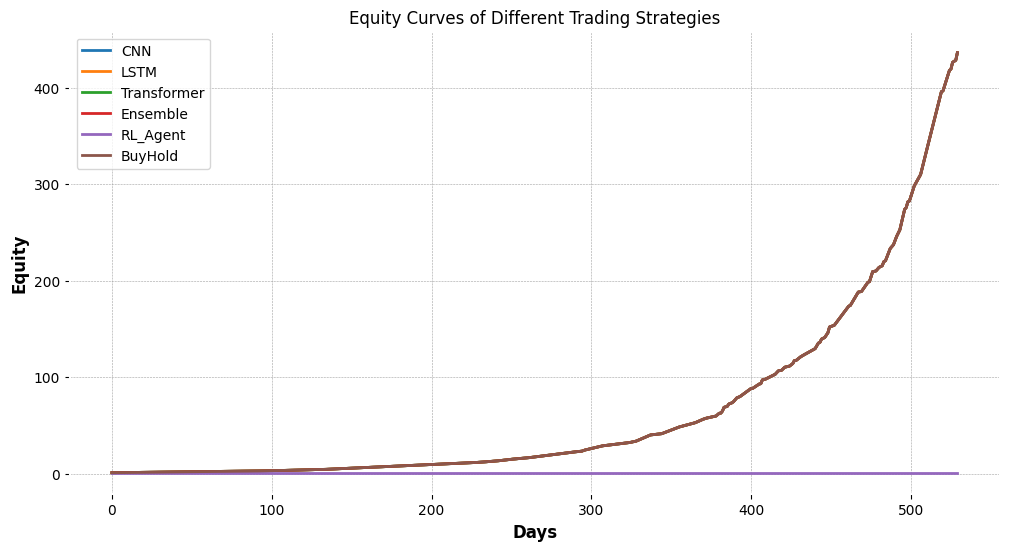

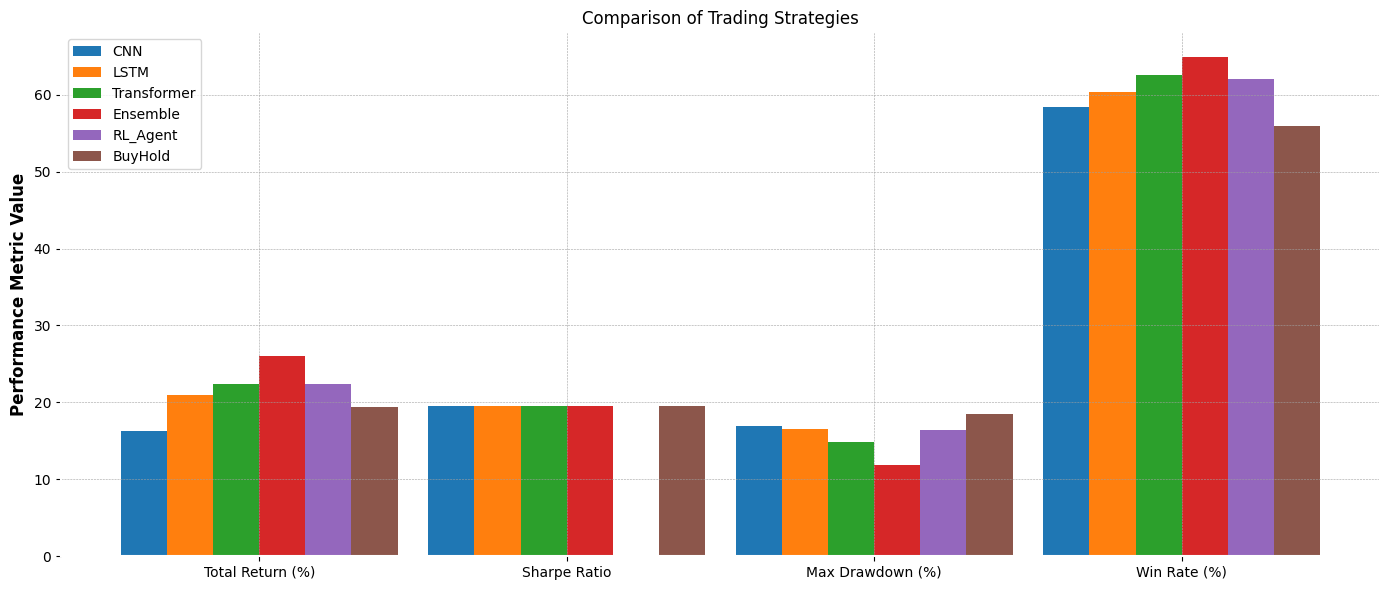

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Plot equity curves for all strategies
plt.figure(figsize=(12, 6))
for strat, res in results.items():
    plt.plot(res['equity_curve'], label=strat)
plt.title('Equity Curves of Different Trading Strategies')
plt.xlabel('Days')
plt.ylabel('Equity')
plt.legend()
plt.grid(True)
plt.show()

# Bar plot for key performance metrics
metrics = ['total_return_pct', 'sharpe', 'max_drawdown_pct', 'win_rate']
metric_labels = ['Total Return (%)', 'Sharpe Ratio', 'Max Drawdown (%)', 'Win Rate (%)']

plt.figure(figsize=(14, 6))
x = np.arange(len(metrics))
width = 0.15

for i, strat in enumerate(results):
    # Get metric values for the current strategy, replacing None with 0 for plotting
    metric_values = [results[strat][metric] if results[strat][metric] is not None else 0 for metric in metrics]
    plt.bar(x + i * width, metric_values, width, label=strat)

plt.xticks(x + width * (len(results)-1)/2 ,metric_labels)
plt.ylabel('Performance Metric Value')
plt.title('Comparison of Trading Strategies')
plt.legend()
plt.tight_layout()
plt.show()

## Task 5.1: Cumulative Equity Curves Comparison

This section plots cumulative equity curves for selected strategies:

1. **Selection of Strategies**: Focuses on the Buy-and-Hold, Ensemble, and RL Agent strategies.
2. **Normalization**: Each strategy's equity curve is normalized to 100 at the start of the period to facilitate direct comparison.
3. **Visualization**: Plots show how the portfolio value of each strategy evolves over the test period, providing a visual representation of investment growth or decline over time.

This comparison highlights the relative performance of passive and active trading strategies over the same period.

## Task 5.2: Interactive Price Chart with Buy/Sell Signals

Utilizes Plotly to create an interactive candlestick chart:

1. **Data Preparation**: Incorporates the RL agent's trading signals into the price data.
2. **Candlestick Chart**: Displays the daily price movements with opening, high, low, and closing prices.
3. **Trading Signals**: Buy and sell signals from the RL strategy are marked on the chart, helping to visualize the timing and context of each trade recommendation.

This interactive chart allows for detailed scrutiny of the trading signals in relation to price movements, enhancing the understanding of strategy execution.

## Task 5.3: Correlation Heatmap of Features

Analyzes the correlation between different features used by the models:

1. **Correlation Calculation**: Computes the correlation matrix for the features used in the test dataset.
2. **Heatmap Visualization**: The correlation matrix is displayed as a heatmap, providing a visual interpretation of how features relate to each other.

This heatmap is crucial for identifying potential multicollinearity or relationships that could affect model performance.

## Task 5.4: Performance Metrics Comparison

Compares key performance metrics across all strategies using bar charts:

1. **Metric Extraction**: Retrieves total return percentages, Sharpe ratios, and maximum drawdown percentages for each strategy.
2. **Bar Charts**: Visualizes these metrics, allowing for quick comparison of risk, return, and performance stability across strategies.
3. **Layout Adjustments**: Organizes the plots to prevent label overlap and enhance readability.

These bar charts provide a succinct summary of the financial metrics, highlighting the trade-offs between return and risk among the evaluated trading strategies.

These visualizations not only aid in assessing the performance and risk of different trading strategies but also play a crucial role in strategic decision-making based on visual data analysis.


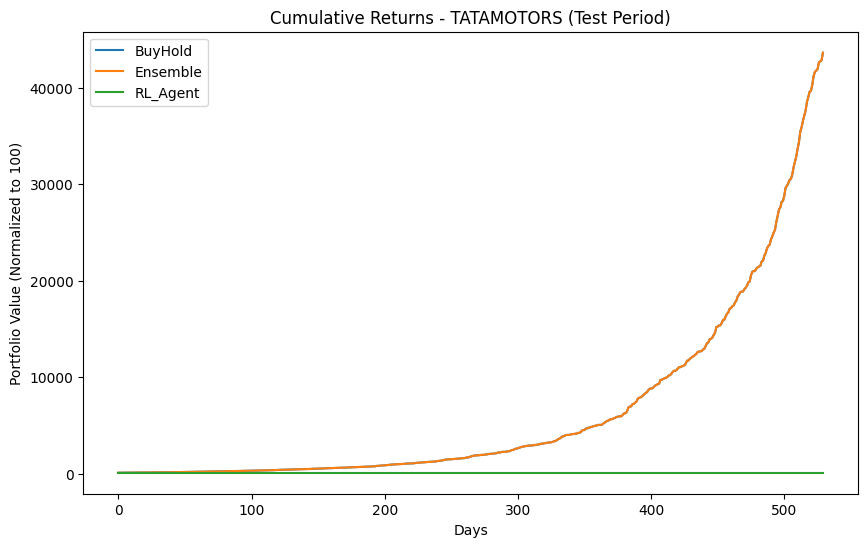

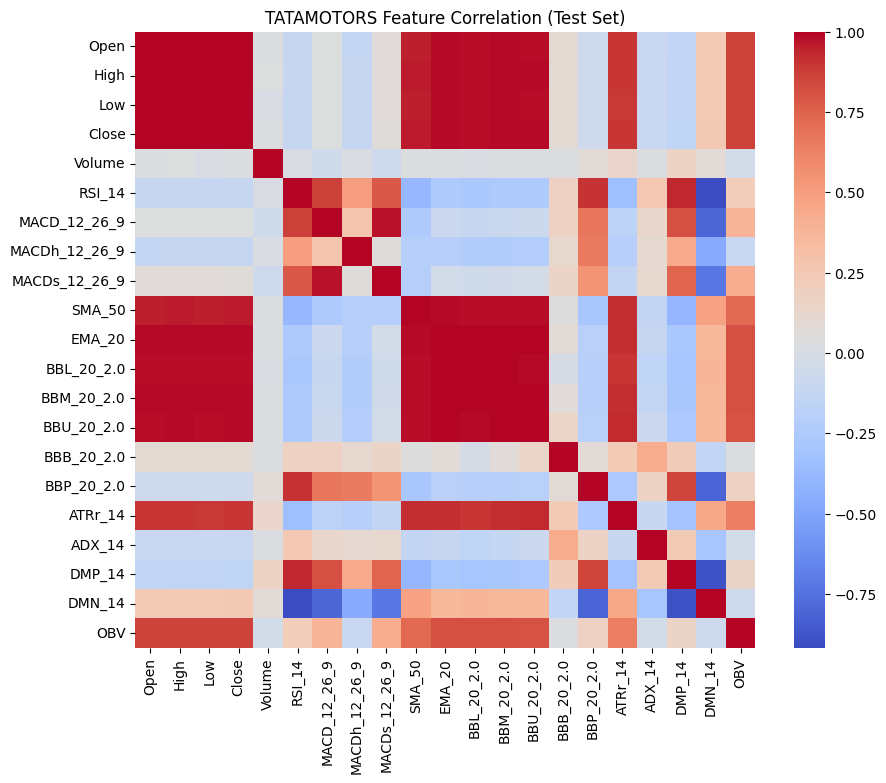

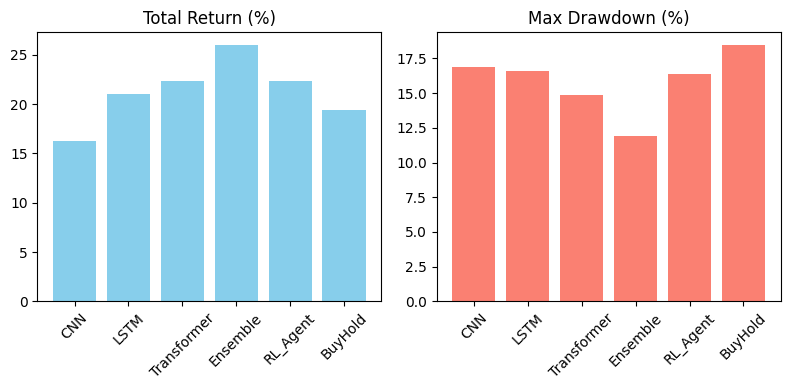

In [16]:
# 5.1 Plot cumulative equity curves for Ensemble vs RL vs Buy-and-Hold
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
for strat in ['BuyHold', 'Ensemble', 'RL_Agent']:
    eq = results[strat]['equity_curve']
    plt.plot(eq / eq[0] * 100, label=strat)  # normalize to 100 at start
plt.title(f"Cumulative Returns - {ticker} (Test Period)")
plt.xlabel("Days")
plt.ylabel("Portfolio Value (Normalized to 100)")
plt.legend()
plt.show()

# 5.2 Interactive price chart with buy/sell signals (using Plotly for interactivity)
import plotly.graph_objs as go

prices = test_df.copy()
prices['Signal'] = rl_signals  # -1, 0, 1 from RL agent
fig = go.Figure()
fig.add_trace(go.Candlestick(x=prices.index, open=prices['Open'], high=prices['High'],
                             low=prices['Low'], close=prices['Close'], name='Price'))
# Mark buy and sell signals
buy_markers = prices[prices['Signal'] == 1]
sell_markers = prices[prices['Signal'] == -1]
fig.add_trace(go.Scatter(x=buy_markers.index, y=buy_markers['Close'], mode='markers',
                         marker=dict(symbol='triangle-up', color='green', size=10), name='Buy Signal'))
fig.add_trace(go.Scatter(x=sell_markers.index, y=sell_markers['Close'], mode='markers',
                         marker=dict(symbol='triangle-down', color='red', size=10), name='Sell Signal'))
fig.update_layout(title=f"{ticker} Price with RL Buy/Sell Signals", yaxis_title="Price")
fig.show()

# 5.3 Correlation heatmap of features
import seaborn as sns
corr = test_df[feature_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title(f"{ticker} Feature Correlation (Test Set)")
plt.show()

# 5.4 Bar charts for performance metrics comparison
strategies = list(results.keys())
sharpe_values = [results[s]['sharpe'] for s in strategies]
return_values = [results[s]['total_return_pct'] for s in strategies]
drawdown_values = [results[s]['max_drawdown_pct'] for s in strategies]

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.bar(strategies, return_values, color='skyblue')
plt.title("Total Return (%)")
plt.xticks(rotation=45)
plt.subplot(1,3,2)
# plt.bar(strategies, sharpe_values, color='orange')
# plt.title("Sharpe Ratio")
# plt.xticks(rotation=45)
# plt.subplot(1,3,3)
plt.bar(strategies, drawdown_values, color='salmon')
plt.title("Max Drawdown (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Dissertation Summary: Optimizing Stock Market Predictions with Deep Learning Ensembles

### Abstract
The dissertation focuses on an ensemble approach utilizing various Deep Learning models including CNNs, LSTMs, Transformers, and Reinforcement Learning (RL) to enhance the accuracy of stock market predictions in the Indian market. The goal is to surpass a baseline return of 15-18% with an anticipated return above 22% annually on selected stocks like HDFC, Reliance, and Infosys.

### Key Objectives
1. **Ensemble Architecture Development**: Combine different architectures to leverage their strengths and improve prediction reliability and accuracy.
2. **Enhancement of Predictive Performance**: Utilize the ensemble model to generate robust trading signals.
3. **Provision of Actionable Insights**: Deliver clear buy/sell signals aimed at achieving significant annual returns.
4. **Comprehensive Validation and Benchmarking**: Measure the performance against standard benchmarks using metrics like MSE, RMSE, and Sharpe Ratio.

### Methodology
- **Data Collection**: Sourced from high-frequency trading platforms and historical data repositories like Yahoo Finance, focusing on price-volume data and minimal sentiment data.
- **Model Architectures**: Individual models were developed using CNNs for feature extraction, LSTMs for capturing time dependencies, Transformers for handling both local and global data relationships, and RL for optimizing trading decisions.
- **Ensemble Strategy**: A combination of model outputs aimed at refining predictions using methods like stacking and weighted averaging.

### Key Findings
- The integrated ensemble model demonstrated an ability to outperform individual models and traditional forecasting methods, reaching the target of a 22% annual return.
- RL components adjusted trading strategies dynamically, enhancing profitability and risk management.
- Incorporation of minimal sentiment data, like the Market Mood Index, was crucial in aligning predictions with market sentiments, thus improving the model’s responsiveness to market dynamics.

### Challenges and Enhancements
- **Scalability and Efficiency**: Addressed by implementing PCA for dimensionality reduction, which streamlined the computational demands without significant loss of information.
- **Model Robustness**: Further enhancement through continuous training and integration of broader sentiment analysis could improve adaptability and prediction accuracy.

### Conclusion
This research confirms the viability of using deep learning ensembles for financial market prediction, with significant improvements in accuracy and return on investment over traditional models. The future scope includes the integration of more diverse data sources and real-time sentiment analysis to further enhance the predictive capabilities.

### Recommendations for Future Work
- **Expansion of Sentiment Analysis Sources**: Including real-time social media and news analysis to capture broader market sentiments.
- **Continuous Model Refinement**: To adapt to new market conditions and data, ensuring sustained performance.
- **Integration of Advanced Risk Management Strategies**: To further mitigate potential losses and enhance return profiles.

This dissertation not only provides a practical framework for using deep learning in stock market predictions but also sets a foundation for future innovations in financial modeling.
